In [95]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Panic Attack\panic_attack_dataset.csv",usecols=['Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score'])

In [3]:
df.columns

Index(['Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

<Axes: ylabel='Heart_Rate'>

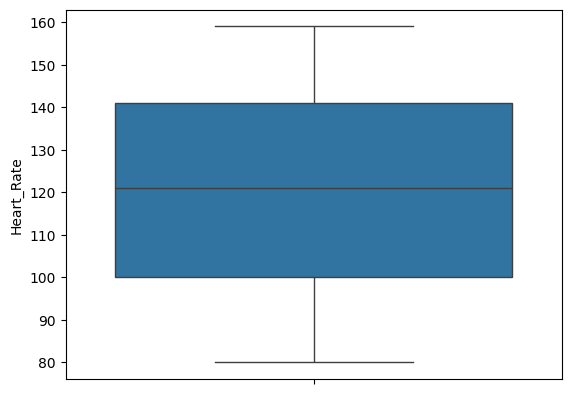

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df['Heart_Rate'])

In [5]:
df.isnull().sum()

Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

Imputation part

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
transformer = ColumnTransformer(transformers=[
    ("MODE on Medical History",SimpleImputer(strategy="most_frequent"),['Medical_History'])
],remainder='passthrough')

In [7]:
transorm_data = transformer.fit_transform(df)

In [8]:
colmns = ['Medical_History'] +[col for col in df.columns if col != 'Medical_History']

In [9]:
df = pd.DataFrame(transorm_data,columns=colmns)

In [10]:
print(df.isnull().sum())

Medical_History           0
Panic_Attack_Frequency    0
Duration_Minutes          0
Trigger                   0
Heart_Rate                0
Sweating                  0
Shortness_of_Breath       0
Dizziness                 0
Chest_Pain                0
Trembling                 0
Medication                0
Caffeine_Intake           0
Exercise_Frequency        0
Sleep_Hours               0
Alcohol_Consumption       0
Smoking                   0
Therapy                   0
Panic_Score               0
dtype: int64


In [11]:
df.shape

(1200, 18)

# Encoding part

In [12]:
df.columns

Index(['Medical_History', 'Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ("Ordinal Transformer(Y/N)",OrdinalEncoder(),['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy'])
],remainder='passthrough')

In [14]:
transorm_data = transformer.fit_transform(df) # apply cols. transormer

In [15]:
# converting to Dataframe

convert_df = ['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy']+['Medical_History','Panic_Attack_Frequency', 'Duration_Minutes','Trigger', 'Heart_Rate','Caffeine_Intake','Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption','Panic_Score']

In [16]:
df = pd.DataFrame(transorm_data,columns=convert_df)

In [17]:
df.head(2)

Sweating Shortness_of_Breath Dizziness Chest_Pain Trembling Medication  \
0      1.0                 0.0       1.0        1.0       0.0        0.0   
1      1.0                 1.0       0.0        0.0       0.0        1.0   

  Smoking Therapy Medical_History Panic_Attack_Frequency Duration_Minutes  \
0     1.0     1.0         Anxiety                      9                5   
1     0.0     1.0            PTSD                      8                9   

    Trigger Heart_Rate Caffeine_Intake Exercise_Frequency Sleep_Hours  \
0  Caffeine        134               2                  3         6.4   
1    Stress        139               2                  5         5.0   

  Alcohol_Consumption Panic_Score  
0                   5           5  
1                   3           7

In [18]:
transformer = ColumnTransformer(transformers=[
    ("One hot encoding",OneHotEncoder(),['Medical_History','Trigger'])
],remainder='passthrough')

In [19]:
transorm_data=transformer.fit_transform(df)

In [20]:
df.columns

Index(['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medication', 'Smoking', 'Therapy', 'Medical_History',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [21]:
# Retrieve feature names for the one-hot encoded columns
ohe_feature_names = transformer.named_transformers_['One hot encoding'].get_feature_names_out(['Medical_History', 'Trigger'])

In [22]:
ohe_feature_names

array(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown'], dtype=object)

In [23]:
# remaining cols
remaning_cols = ['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain','Trembling', 'Medication', 'Smoking', 'Therapy','Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate','Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours','Alcohol_Consumption', 'Panic_Score']

In [24]:
all_column_names = list(ohe_feature_names) + remaning_cols

# Convert to DataFrame
df = pd.DataFrame(transorm_data, columns=all_column_names)

In [25]:
df.head(2)

Medical_History_Anxiety Medical_History_Depression Medical_History_PTSD  \
0                     1.0                        0.0                  0.0   
1                     0.0                        0.0                  1.0   

  Trigger_Caffeine Trigger_PTSD Trigger_Phobia Trigger_Social Anxiety  \
0              1.0          0.0            0.0                    0.0   
1              0.0          0.0            0.0                    0.0   

  Trigger_Stress Trigger_Unknown Sweating  ... Smoking Therapy  \
0            0.0             0.0      1.0  ...     1.0     1.0   
1            1.0             0.0      1.0  ...     0.0     1.0   

  Panic_Attack_Frequency Duration_Minutes Heart_Rate Caffeine_Intake  \
0                      9                5        134               2   
1                      8                9        139               2   

  Exercise_Frequency Sleep_Hours Alcohol_Consumption Panic_Score  
0                  3         6.4                   5           5  
1                  5         5.0                   3           7  

[2 rows x 25 columns]

In [26]:
df.shape

(1200, 25)

In [27]:
df = df.sample(1200)

In [28]:
df.head(2)

Medical_History_Anxiety Medical_History_Depression Medical_History_PTSD  \
717                     1.0                        0.0                  0.0   
651                     1.0                        0.0                  0.0   

    Trigger_Caffeine Trigger_PTSD Trigger_Phobia Trigger_Social Anxiety  \
717              0.0          0.0            1.0                    0.0   
651              0.0          0.0            0.0                    0.0   

    Trigger_Stress Trigger_Unknown Sweating  ... Smoking Therapy  \
717            0.0             0.0      1.0  ...     0.0     1.0   
651            1.0             0.0      1.0  ...     0.0     1.0   

    Panic_Attack_Frequency Duration_Minutes Heart_Rate Caffeine_Intake  \
717                      8               30        142               1   
651                      5               19        130               5   

    Exercise_Frequency Sleep_Hours Alcohol_Consumption Panic_Score  
717                  6         6.1                   9           8  
651                  0         6.9                   4           5  

[2 rows x 25 columns]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(columns=['Panic_Score'])
y=df['Panic_Score']

In [31]:
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(840, 24)
(360, 24)
(840,)
(360,)
(360,)


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [38]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

2.3523105590359403
7.5351686344119635
2.745026162791889


# Visualization of Original vs Predicted Data

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [40]:
# Creating a DataFrame for comparision
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


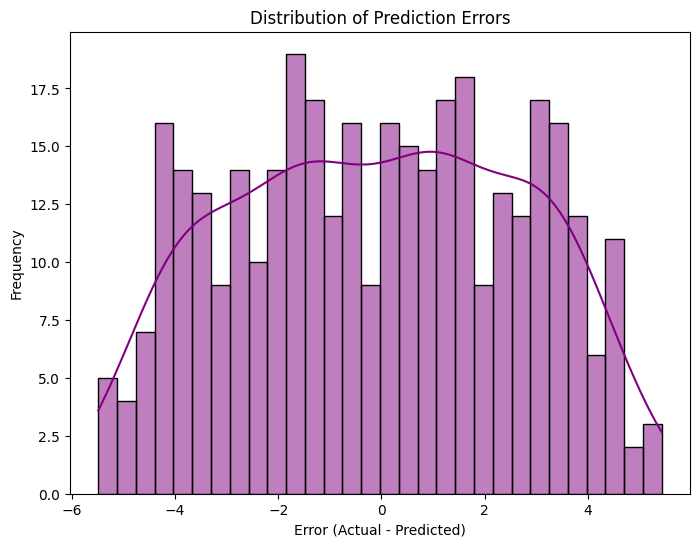

In [41]:
errors = comparison_df['Actual'] - comparison_df['Predicted']
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30, color='purple')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [42]:
df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [43]:
import matplotlib.pyplot as plt

def viz(data):
    """
    Visualize all columns in the dataset using line plots.
    
    Args:
    data (pd.DataFrame): The DataFrame to visualize.
    """
    for column in data.columns:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data[column], label=column)
        plt.title(f"Visualization of {column}")
        plt.xlabel("Index")
        plt.ylabel("Values")
        plt.legend()
        plt.grid(True)
        plt.show()


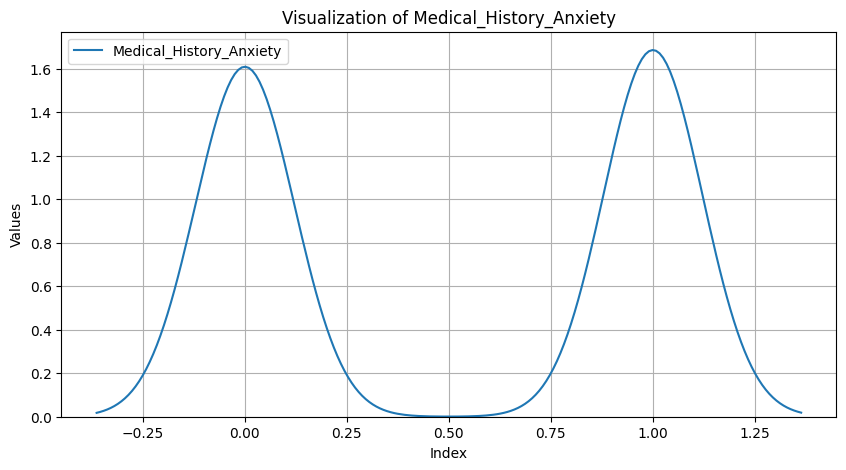

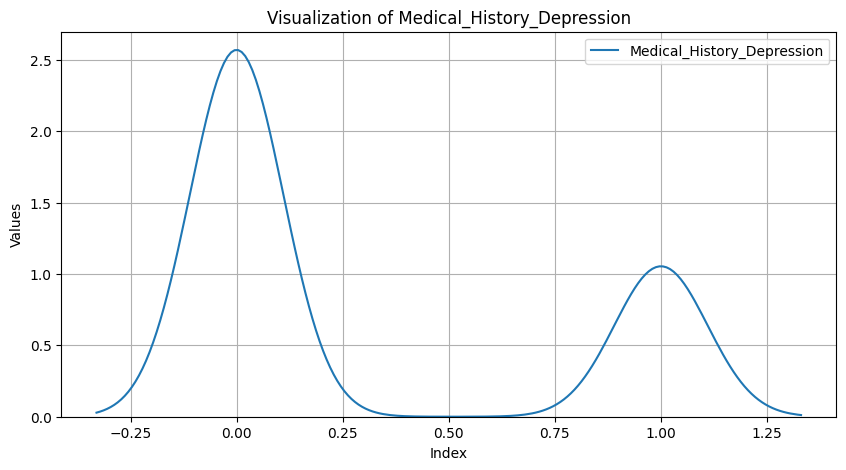

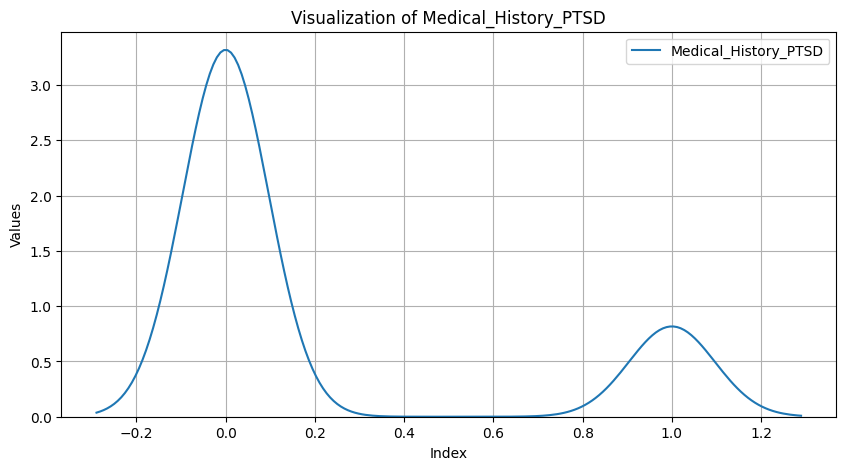

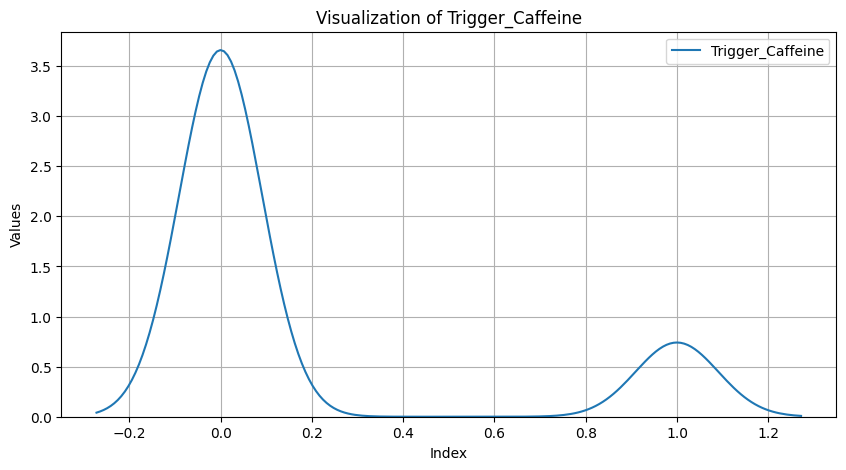

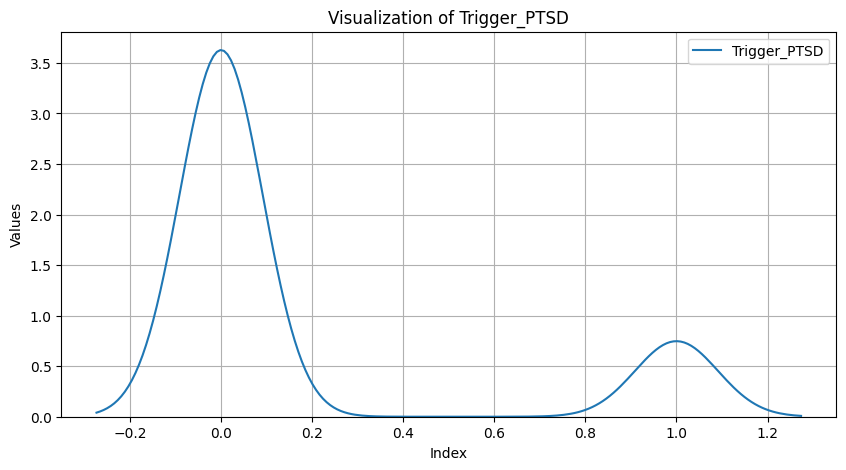

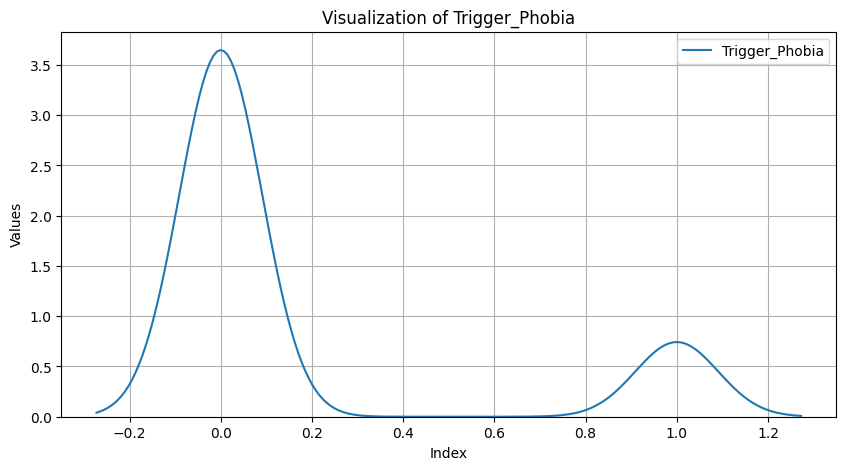

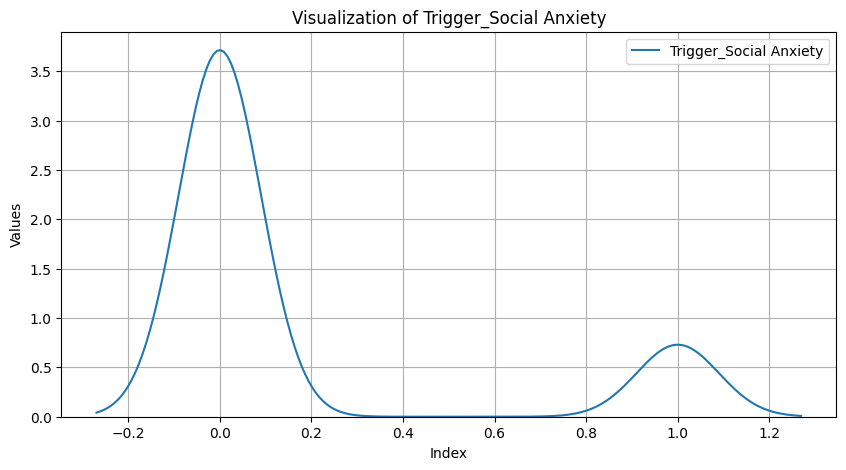

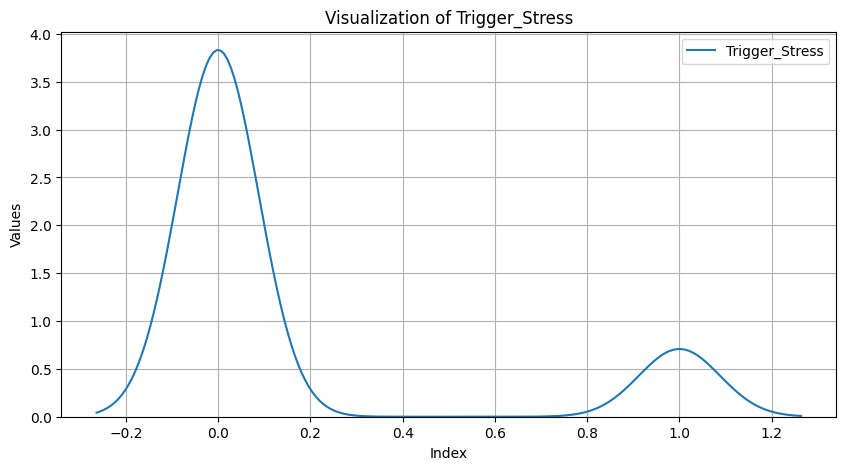

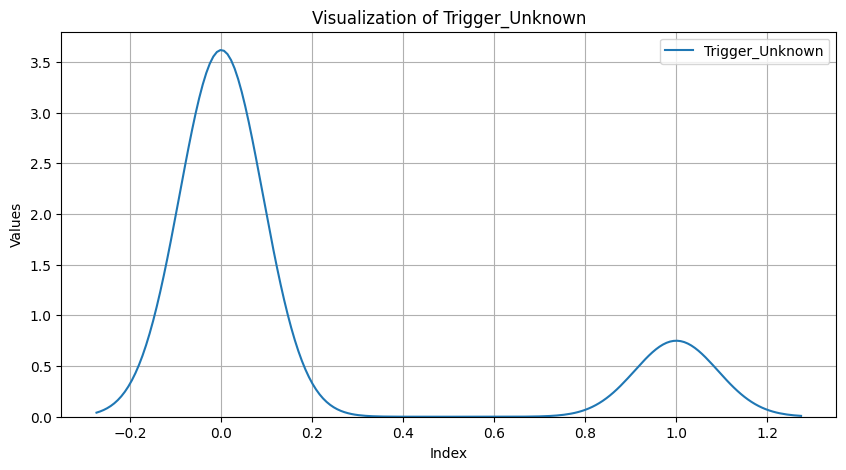

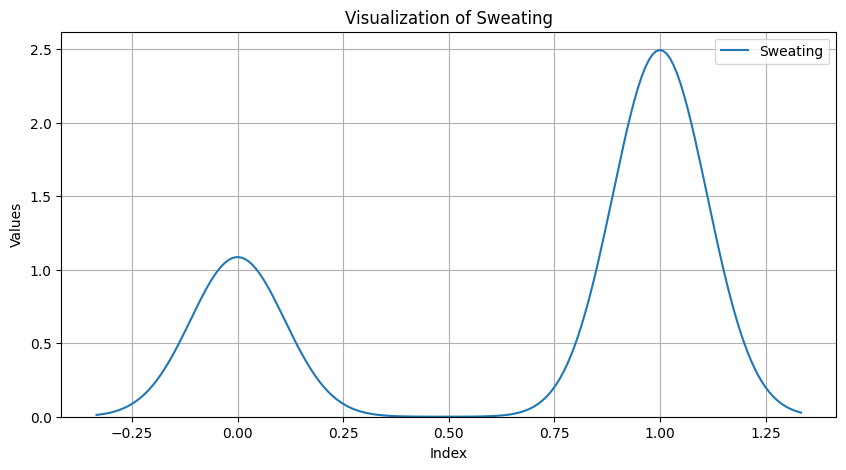

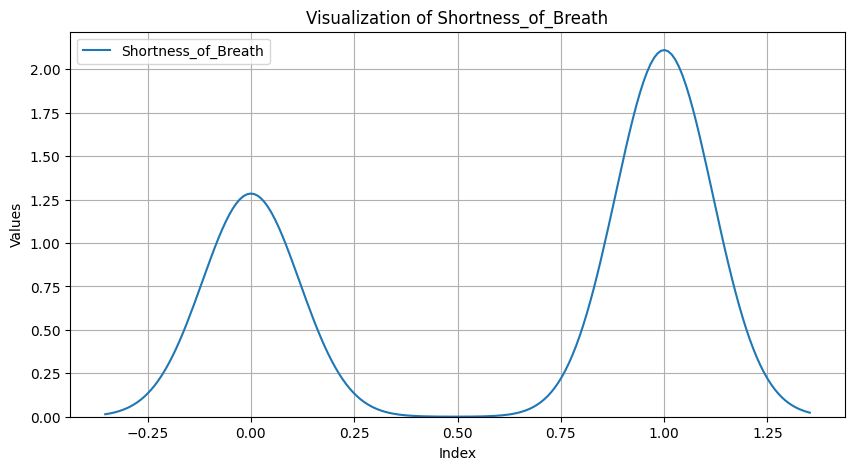

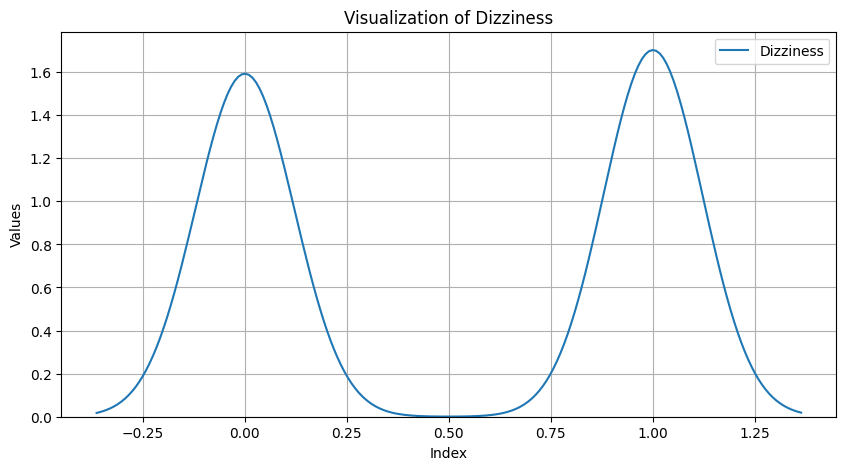

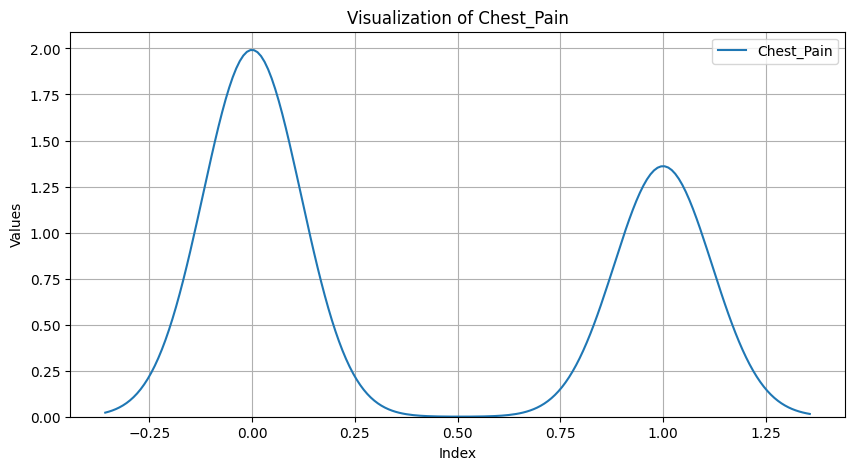

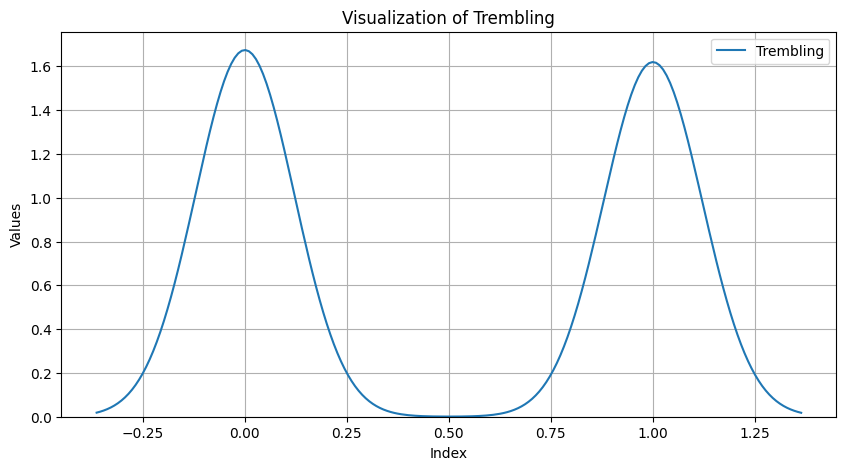

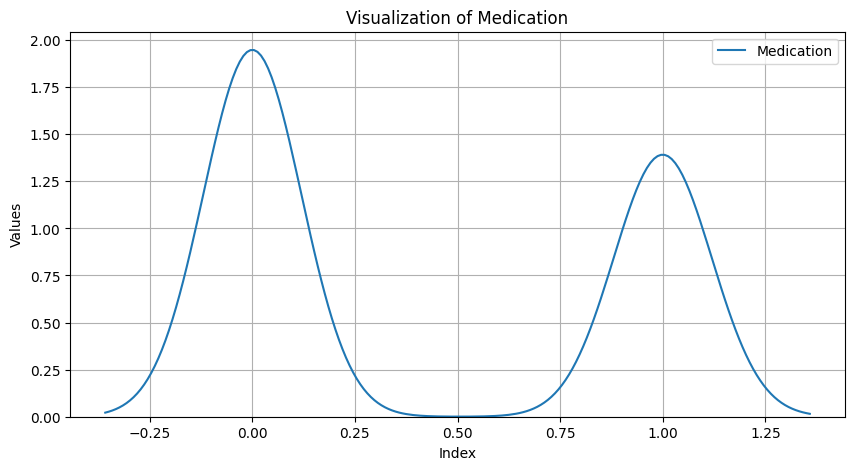

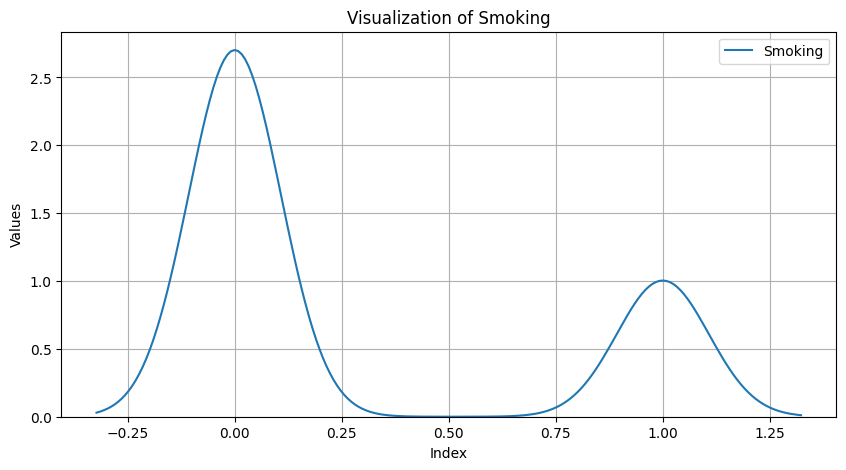

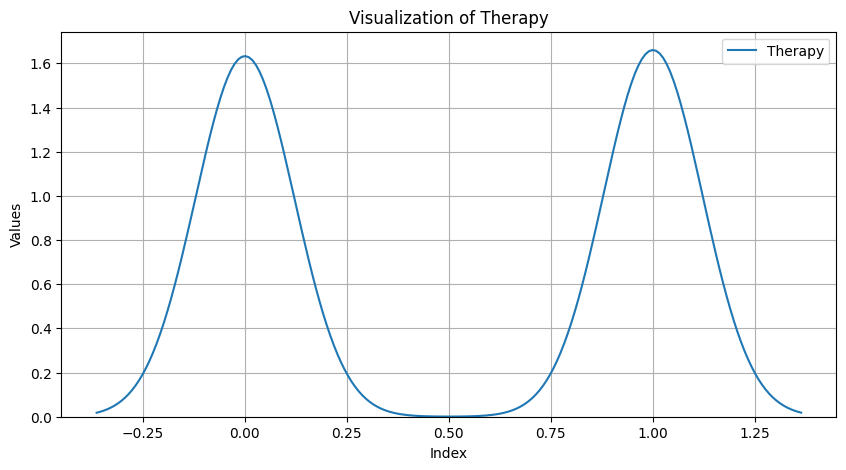

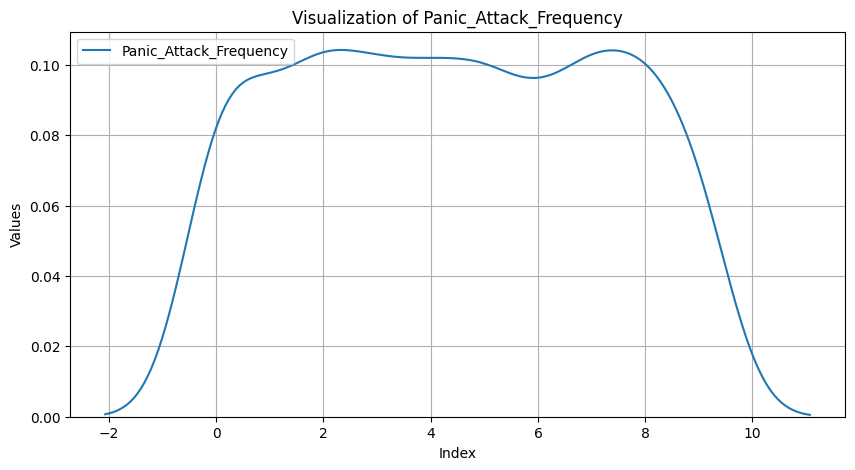

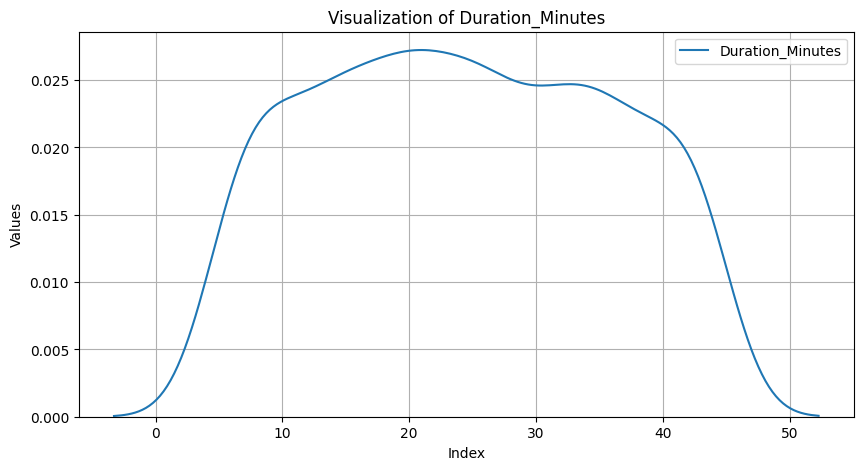

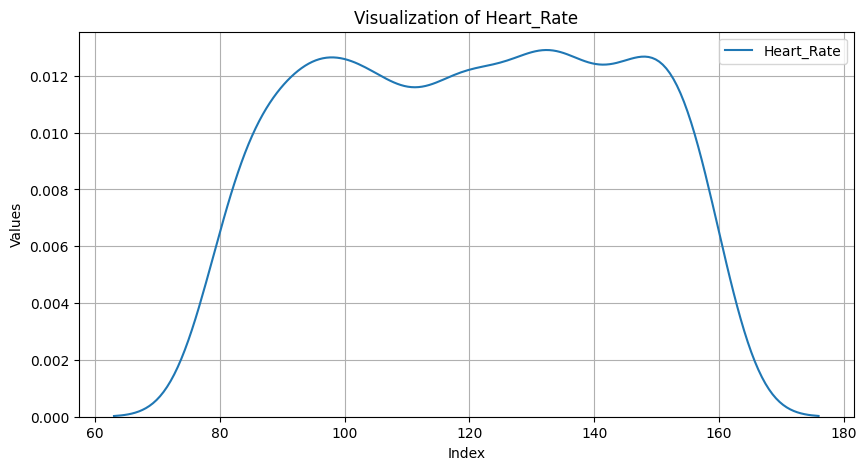

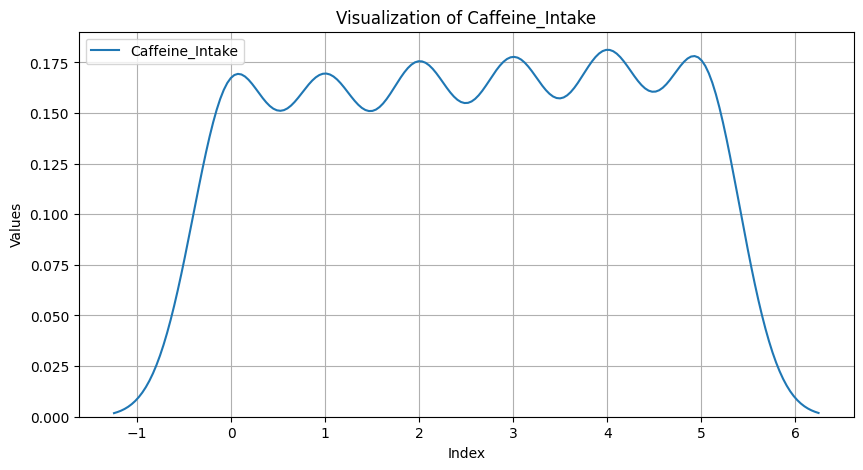

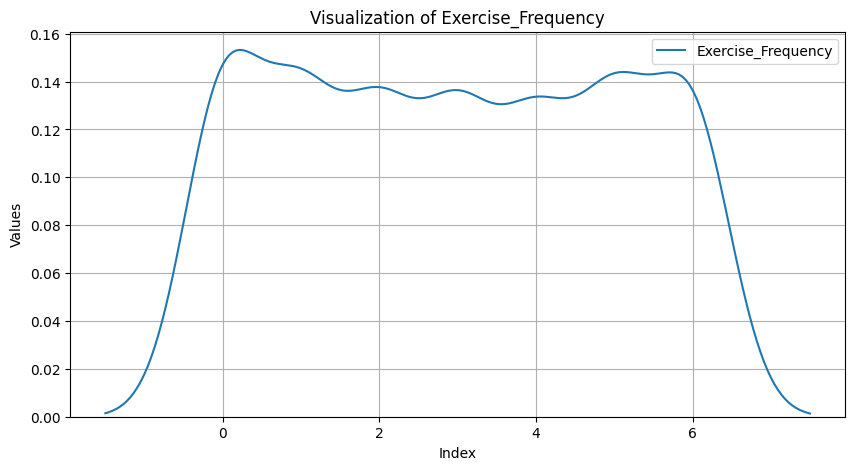

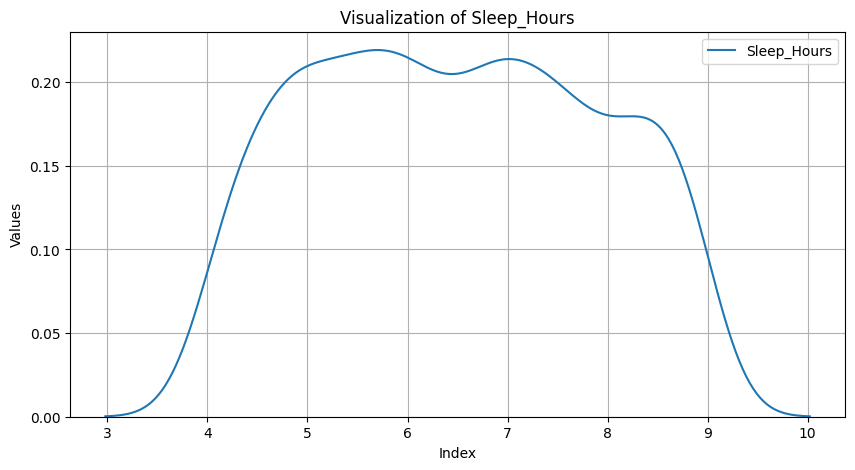

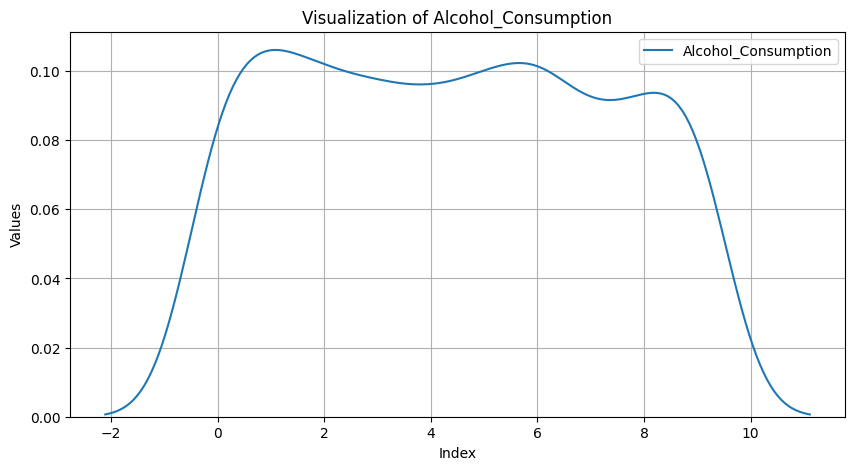

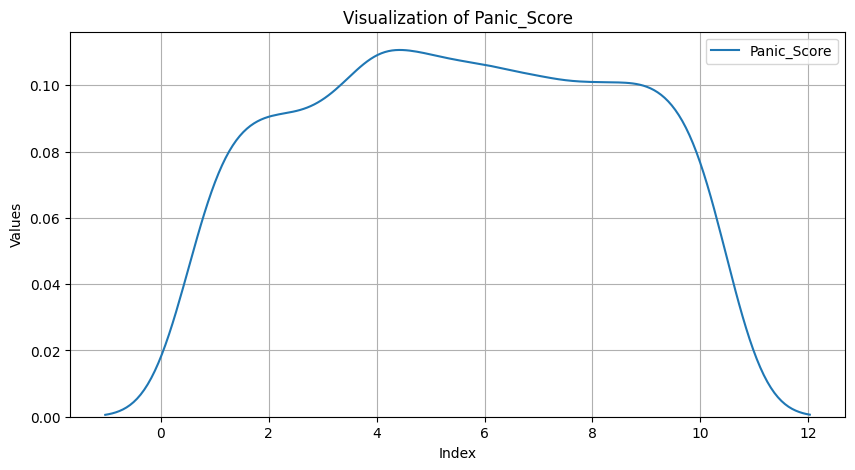

In [44]:
viz(df)

# Scaalling

In [45]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [46]:
scale_df = scale.fit_transform(df)

In [47]:
df = pd.DataFrame(scale_df,columns=df.columns)

In [48]:
df

Medical_History_Anxiety  Medical_History_Depression  \
0                         1.0                         0.0   
1                         1.0                         0.0   
2                         1.0                         0.0   
3                         1.0                         0.0   
4                         1.0                         0.0   
...                       ...                         ...   
1195                      1.0                         0.0   
1196                      0.0                         1.0   
1197                      0.0                         0.0   
1198                      0.0                         0.0   
1199                      1.0                         0.0   

      Medical_History_PTSD  Trigger_Caffeine  Trigger_PTSD  Trigger_Phobia  \
0                      0.0               0.0           0.0             1.0   
1                      0.0               0.0           0.0             0.0   
2                      0.0               1.0           0.0             0.0   
3                      0.0               0.0           0.0             0.0   
4                      0.0               0.0           0.0             1.0   
...                    ...               ...           ...             ...   
1195                   0.0               0.0           0.0             0.0   
1196                   0.0               0.0           0.0             0.0   
1197                   1.0               0.0           1.0             0.0   
1198                   1.0               1.0           0.0             0.0   
1199                   0.0               0.0           1.0             0.0   

      Trigger_Social Anxiety  Trigger_Stress  Trigger_Unknown  Sweating  ...  \
0                        0.0             0.0              0.0       1.0  ...   
1                        0.0             1.0              0.0       1.0  ...   
2                        0.0             0.0              0.0       0.0  ...   
3                        0.0             0.0              1.0       1.0  ...   
4                        0.0             0.0              0.0       1.0  ...   
...                      ...             ...              ...       ...  ...   
1195                     0.0             1.0              0.0       1.0  ...   
1196                     0.0             1.0              0.0       1.0  ...   
1197                     0.0             0.0              0.0       0.0  ...   
1198                     0.0             0.0              0.0       0.0  ...   
1199                     0.0             0.0              0.0       1.0  ...   

      Smoking  Therapy  Panic_Attack_Frequency  Duration_Minutes  Heart_Rate  \
0         0.0      1.0                0.888889          0.641026    0.784810   
1         0.0      1.0                0.555556          0.358974    0.632911   
2         0.0      0.0                0.000000          0.743590    0.860759   
3         1.0      1.0                0.222222          0.641026    0.987342   
4         0.0      0.0                0.333333          0.410256    0.215190   
...       ...      ...                     ...               ...         ...   
1195      0.0      1.0                0.777778          0.025641    0.164557   
1196      1.0      0.0                0.666667          0.846154    0.670886   
1197      0.0      0.0                0.888889          0.461538    0.291139   
1198      0.0      1.0                0.222222          0.384615    0.202532   
1199      0.0      0.0                0.666667          0.128205    0.721519   

      Caffeine_Intake  Exercise_Frequency  Sleep_Hours  Alcohol_Consumption  \
0                 0.2            1.000000         0.42             1.000000   
1                 1.0            0.000000         0.58             0.444444   
2                 0.8            0.333333         0.18             0.222222   
3                 0.6            0.333333         0.64             0.888889   
4                 0

In [49]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



In [50]:
df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [51]:
X = df.drop(columns=['Panic_Score'])
y = df['Panic_Score']

In [52]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
pca = PCA(n_components=10)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor()
clf3 = RandomForestRegressor()
clf4 = GradientBoostingRegressor()

# Train models
clf1.fit(X_train_trf, y_train)
clf2.fit(X_train_trf, y_train)
clf3.fit(X_train_trf, y_train)
clf4.fit(X_train_trf, y_train)

# Make predictions
y_pred1 = clf1.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)
y_pred3 = clf3.predict(X_test_trf)
y_pred4 = clf4.predict(X_test_trf)

# Evaluate models
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R²:", r2_score(y_test, y_pred1))

print("\nDecision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R²:", r2_score(y_test, y_pred2))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R²:", r2_score(y_test, y_pred3))

print("\nGradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE:", mean_squared_error(y_test, y_pred4))
print("R²:", r2_score(y_test, y_pred4))


Linear Regression:
MAE: 0.2544167207948702
MSE: 0.08933758836017619
R²: 0.006450481905983851

Decision Tree:
MAE: 0.369753086419753
MSE: 0.2029492455418381
R²: -1.2570580738389627

Random Forest:
MAE: 0.2569475308641975
MSE: 0.09145077846364881
R²: -0.01705092492046445

Gradient Boosting:
MAE: 0.2576808199595507
MSE: 0.09277646276595676
R²: -0.03179424879879278


# Gradient decent

In [55]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
reg.fit(X_train_trf, y_train)

SGDRegressor(learning_rate='constant')

In [56]:
y_pred = reg.predict(X_test_trf)
r2_score(y_test,y_pred)

-0.002953042625504887

## EDA with encoded dataset

In [57]:
df.head(1)

Medical_History_Anxiety  Medical_History_Depression  Medical_History_PTSD  \
0                      1.0                         0.0                   0.0   

   Trigger_Caffeine  Trigger_PTSD  Trigger_Phobia  Trigger_Social Anxiety  \
0               0.0           0.0             1.0                     0.0   

   Trigger_Stress  Trigger_Unknown  Sweating  ...  Smoking  Therapy  \
0             0.0              0.0       1.0  ...      0.0      1.0   

   Panic_Attack_Frequency  Duration_Minutes  Heart_Rate  Caffeine_Intake  \
0                0.888889          0.641026     0.78481              0.2   

   Exercise_Frequency  Sleep_Hours  Alcohol_Consumption  Panic_Score  
0                 1.0         0.42                  1.0     0.777778  

[1 rows x 25 columns]

In [58]:
# pandas profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Lasso regression
L1 regularization to Linear Regression for feature selection

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_trf, y_train)

# Make predictions
y_pred4 = lasso.predict(X_test_trf)
print("\nLasso:")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE:", mean_squared_error(y_test, y_pred4))
print("R²:", r2_score(y_test, y_pred4))


Lasso:
MAE: 0.2578439153439153
MSE: 0.09002864794751919
R²: -0.0012349944157046266


In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Medical_History_Anxiety     1200 non-null   float64
 1   Medical_History_Depression  1200 non-null   float64
 2   Medical_History_PTSD        1200 non-null   float64
 3   Trigger_Caffeine            1200 non-null   float64
 4   Trigger_PTSD                1200 non-null   float64
 5   Trigger_Phobia              1200 non-null   float64
 6   Trigger_Social Anxiety      1200 non-null   float64
 7   Trigger_Stress              1200 non-null   float64
 8   Trigger_Unknown             1200 non-null   float64
 9   Sweating                    1200 non-null   float64
 10  Shortness_of_Breath         1200 non-null   float64
 11  Dizziness                   1200 non-null   float64
 12  Chest_Pain                  1200 non-null   float64
 13  Trembling                   1200 

In [61]:
import seaborn as sns 
def vizu(data):
    for i in df.columns:
        if i != "Panic_Score" :
            sns.scatterplot(data=df, x=i, y="Panic_Score")
            plt.title(f"Scatter Plot: {i} vs Panic_Score")
            plt.xlabel(i)
            plt.ylabel("Panic_Score")
            plt.show()  # Display each plot separately

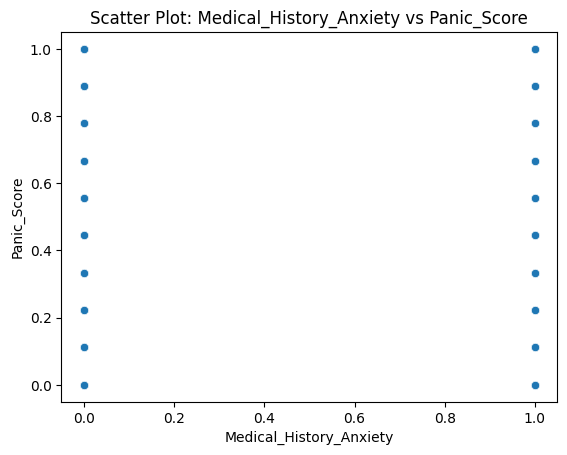

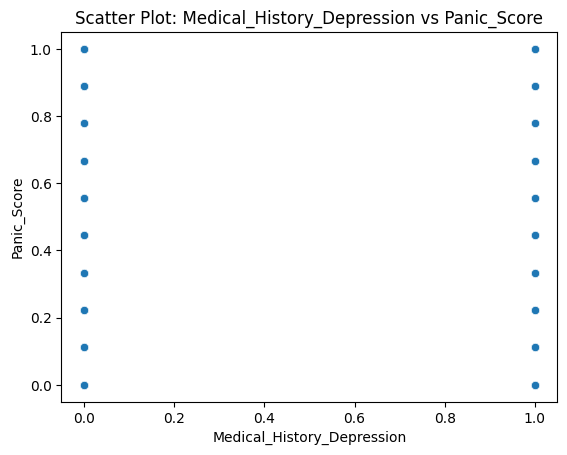

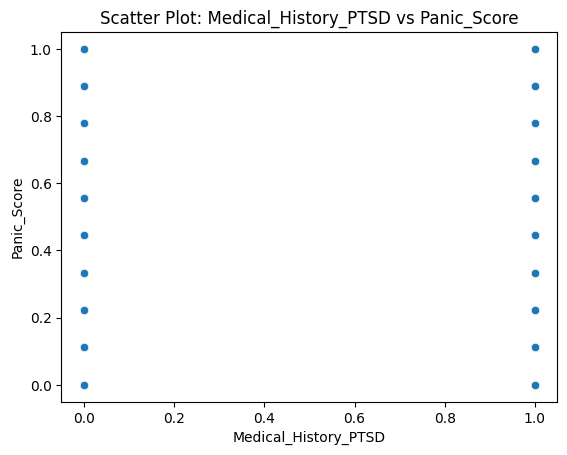

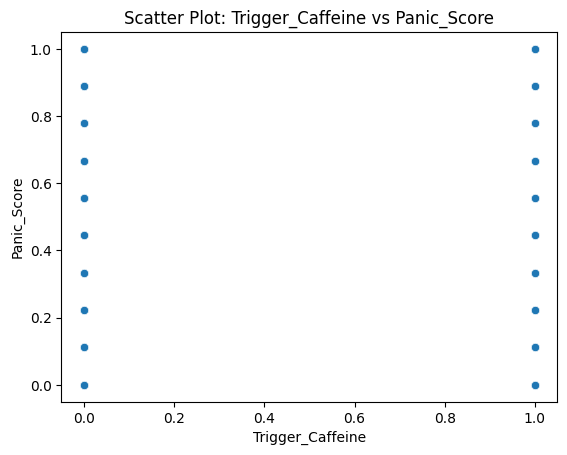

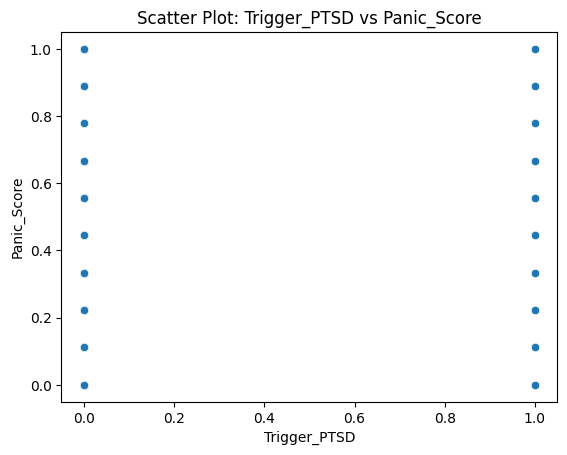

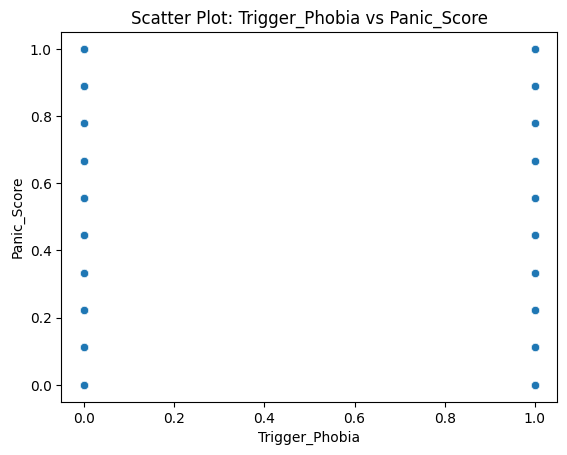

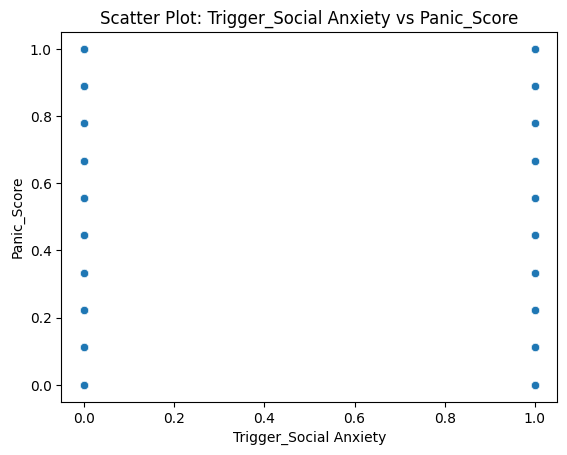

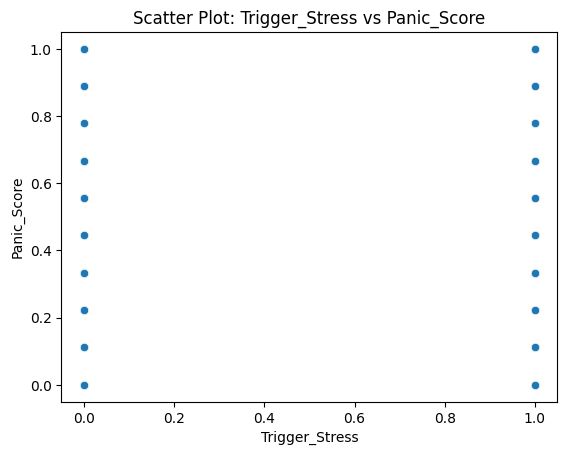

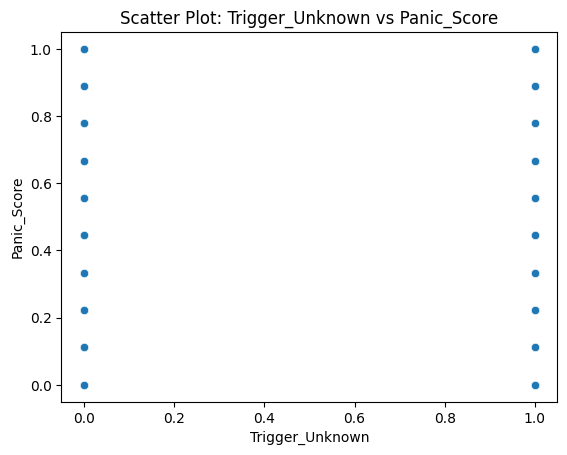

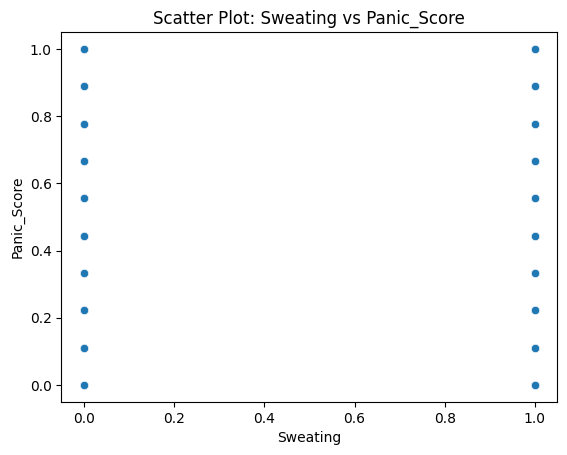

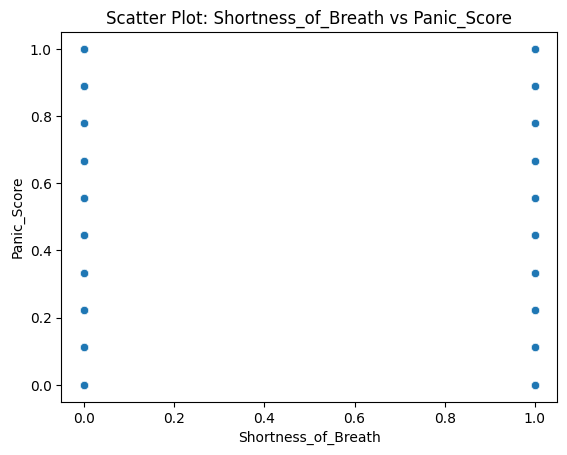

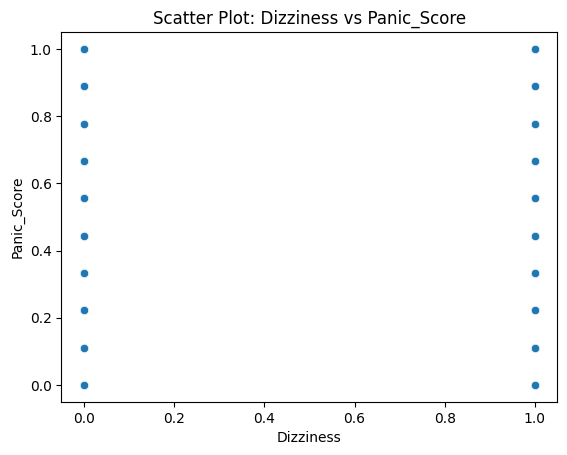

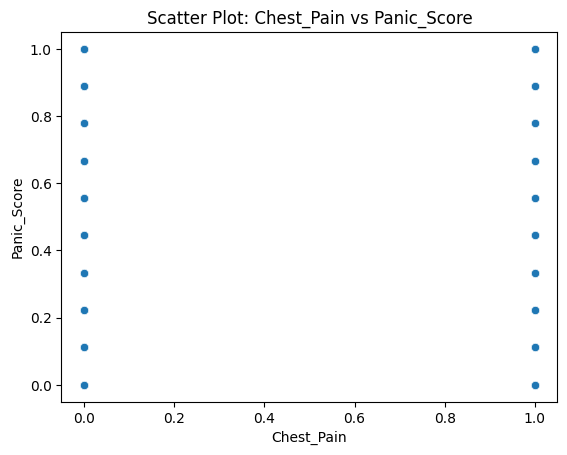

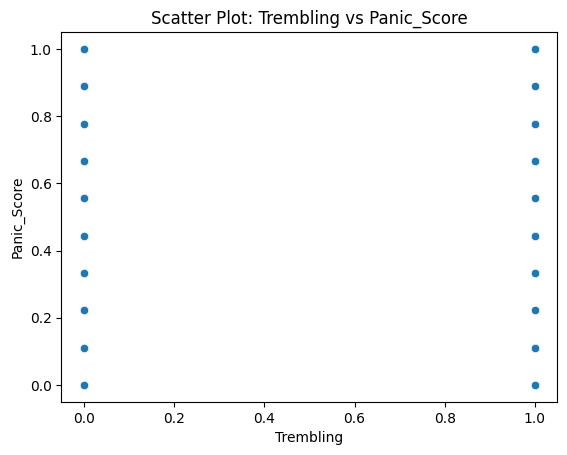

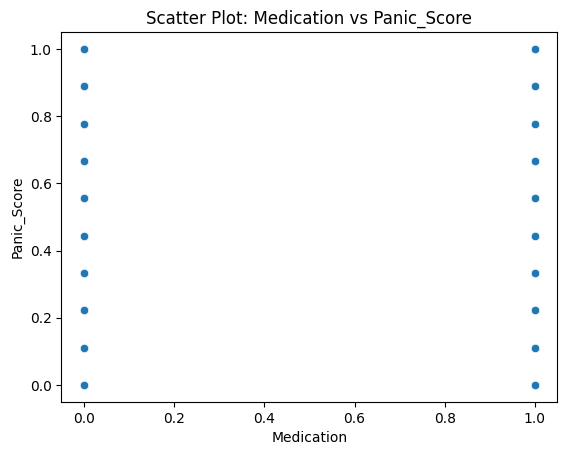

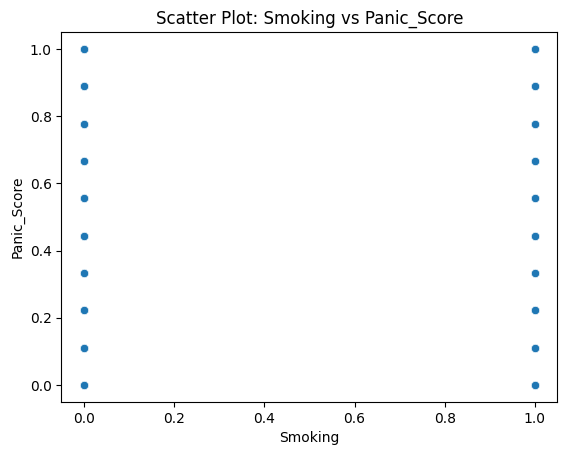

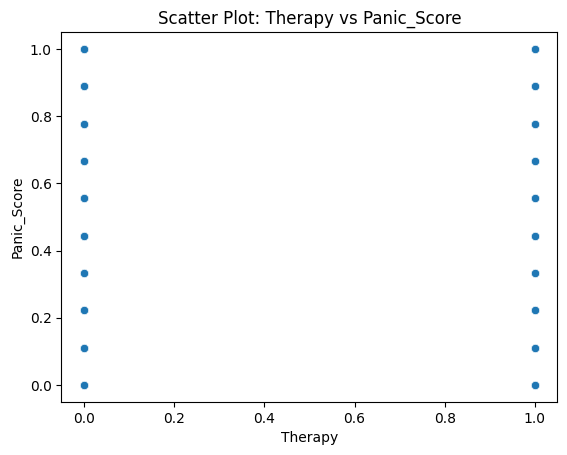

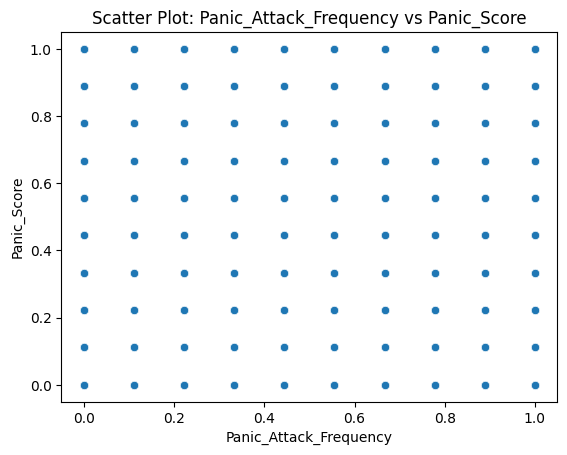

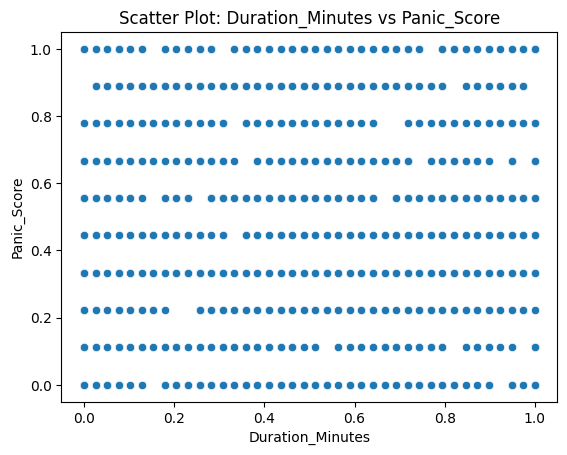

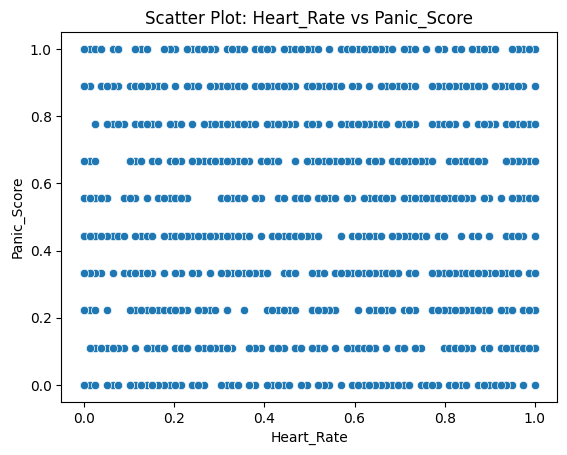

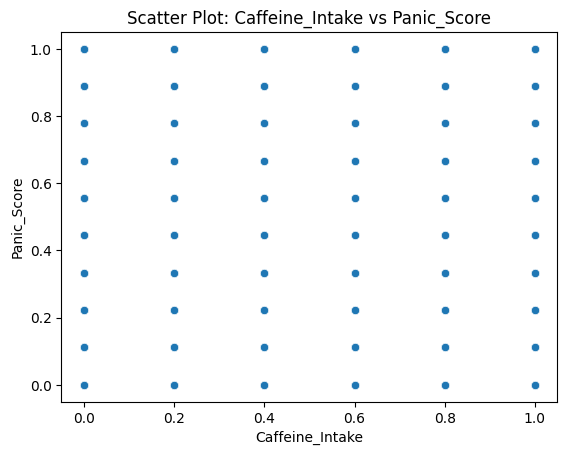

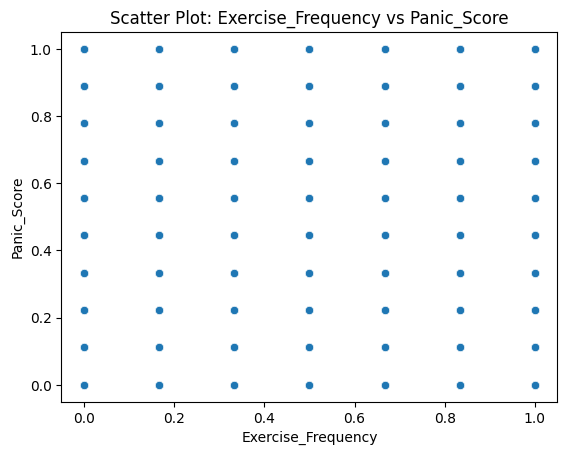

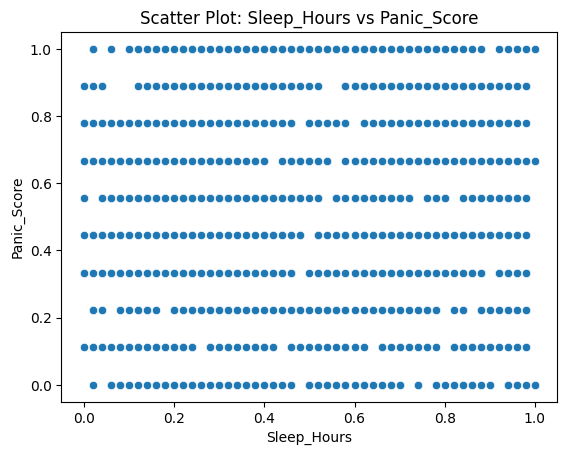

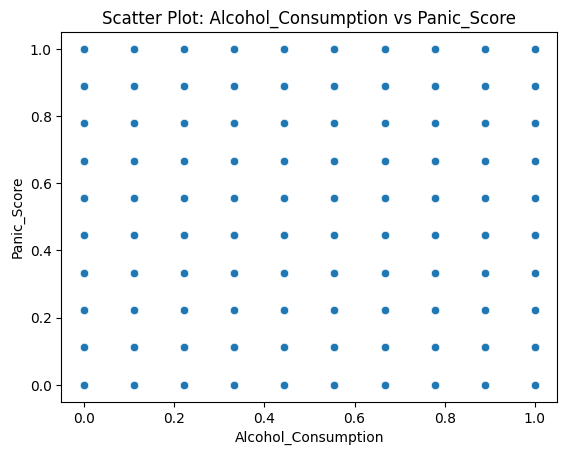

In [62]:
vizu(df)

In [63]:
def Kde(data):
    for i in df.columns:
        sns.kdeplot(data=df , x=i)
        plt.title(f"KDE Plot: {i}")
        plt.xlabel(i)
        plt.ylabel("Panic_Score")
        plt.show()

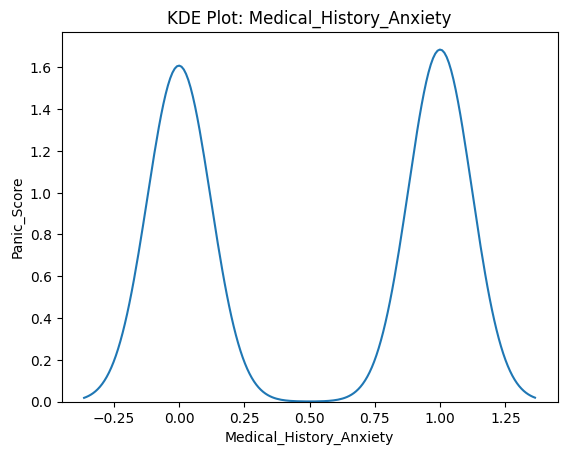

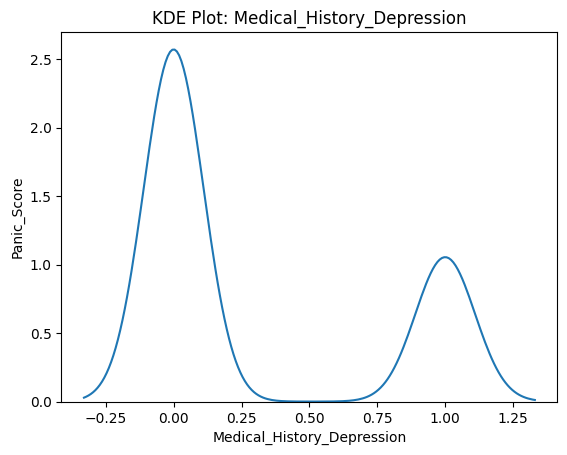

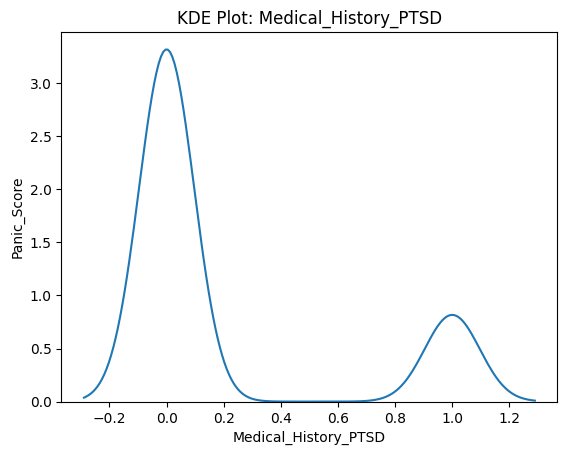

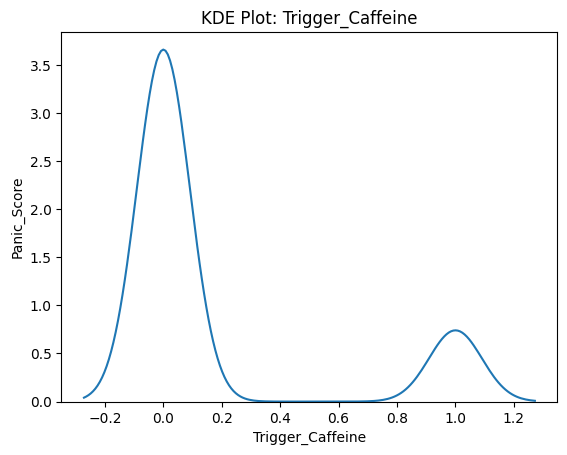

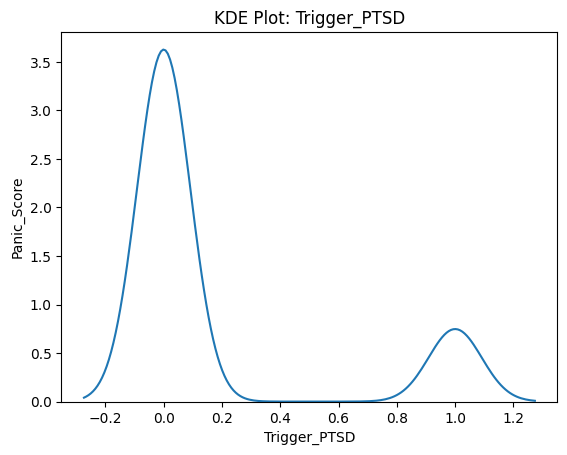

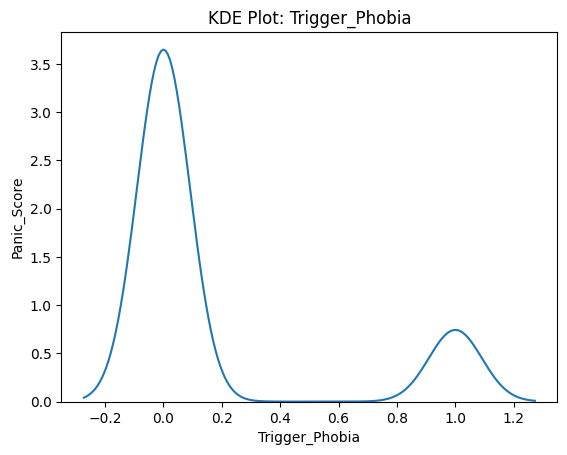

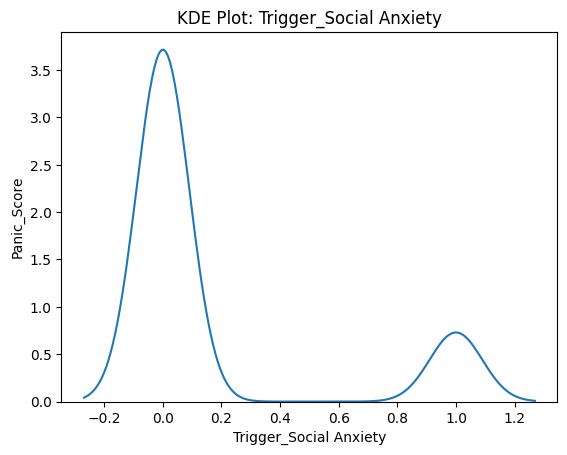

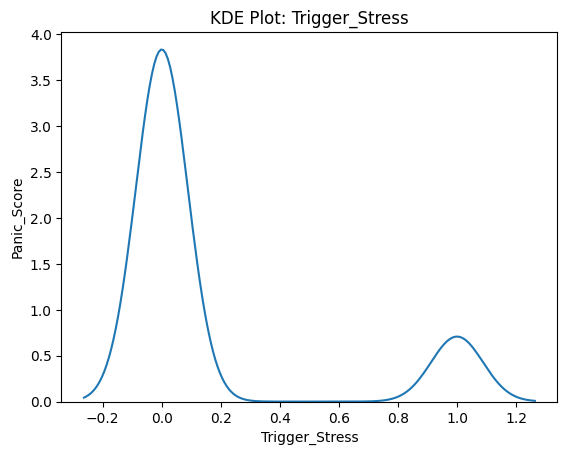

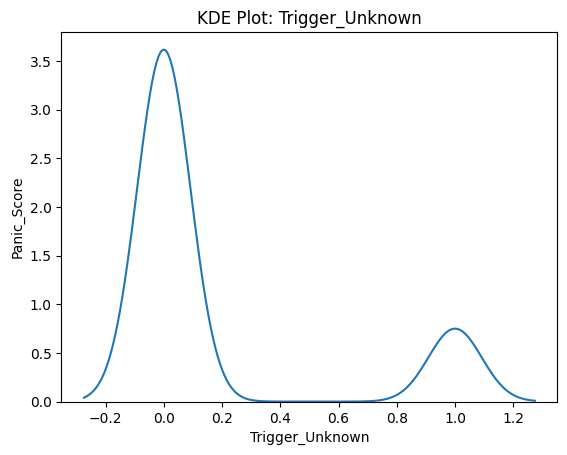

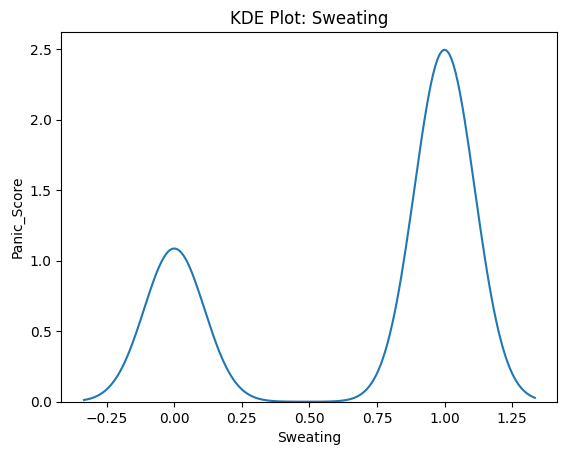

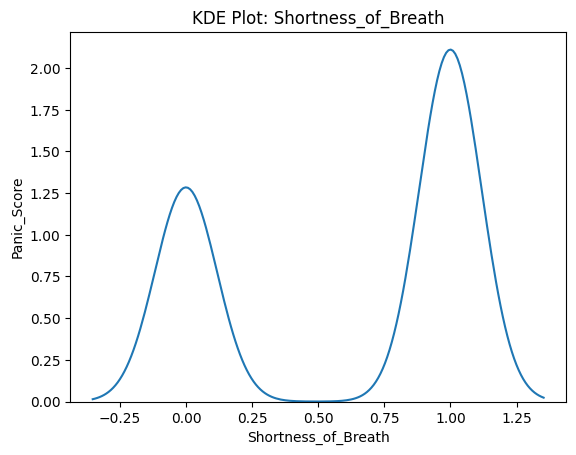

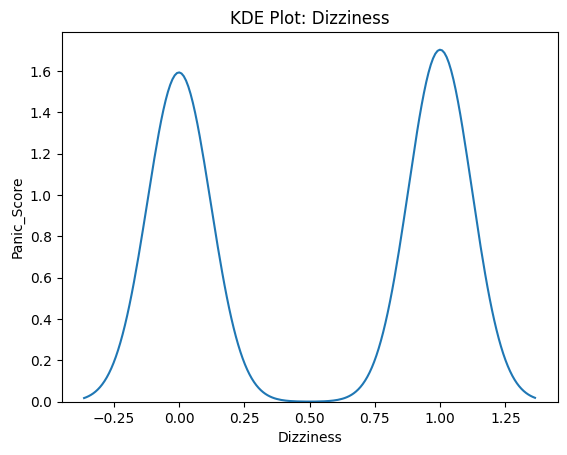

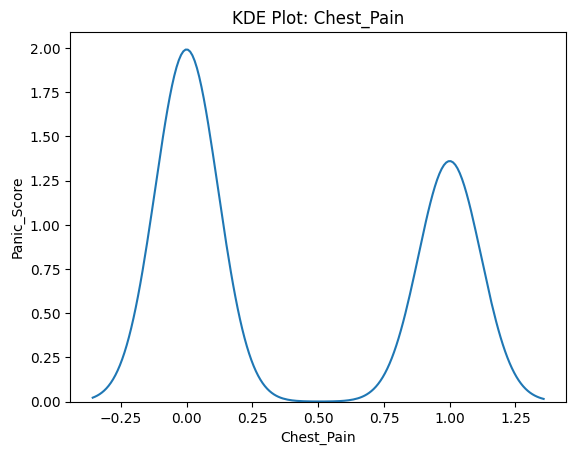

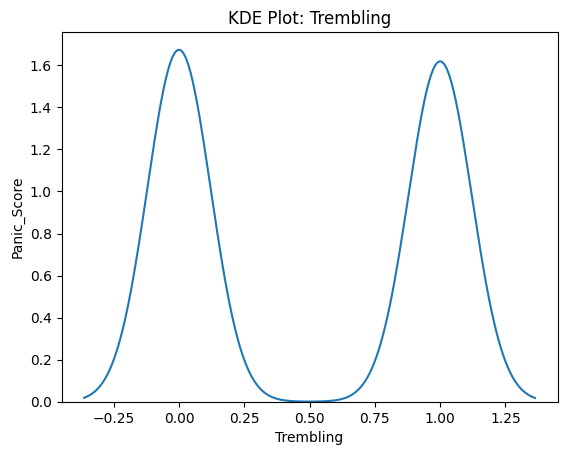

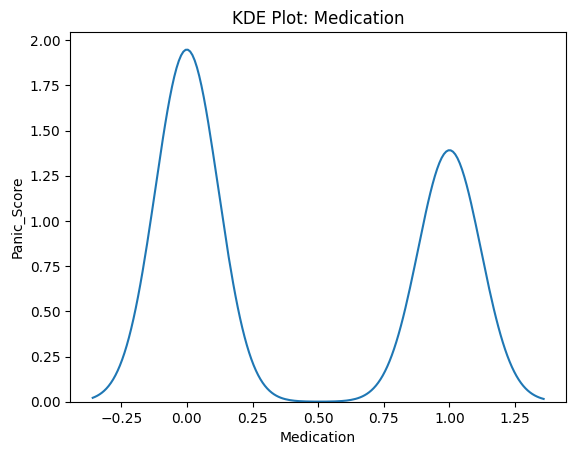

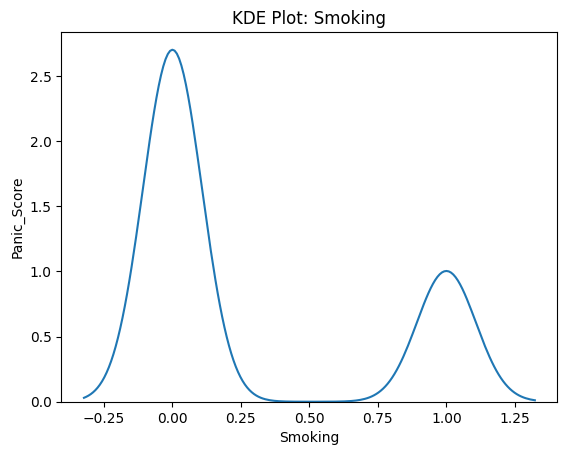

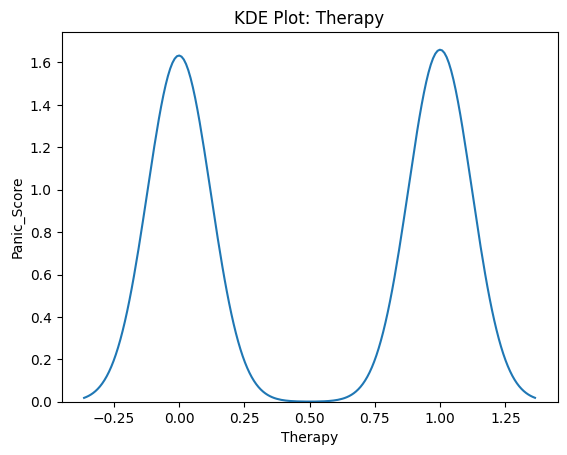

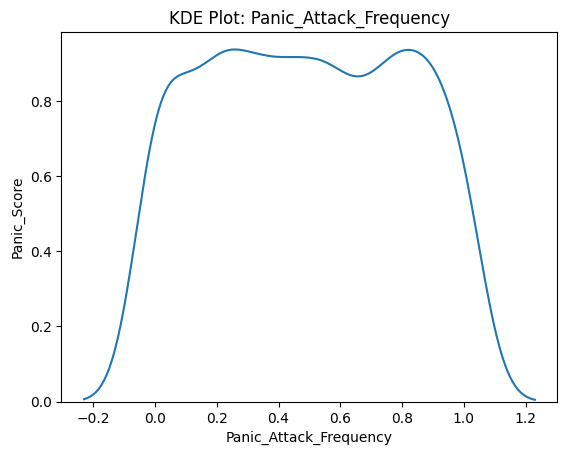

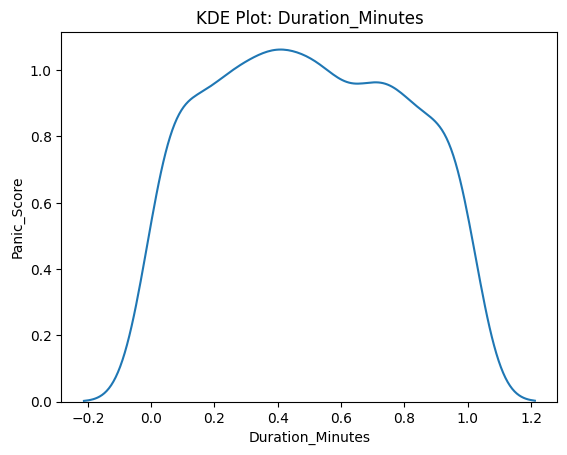

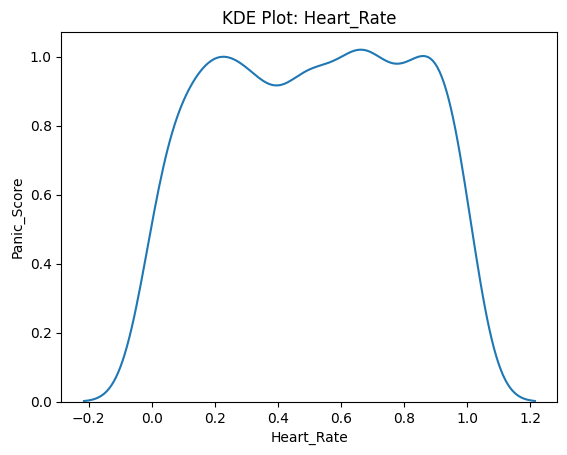

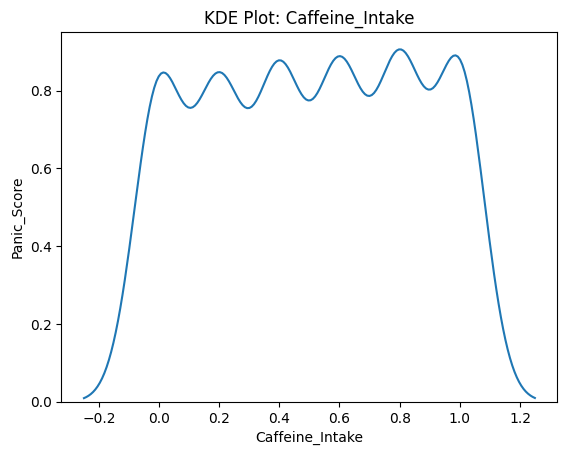

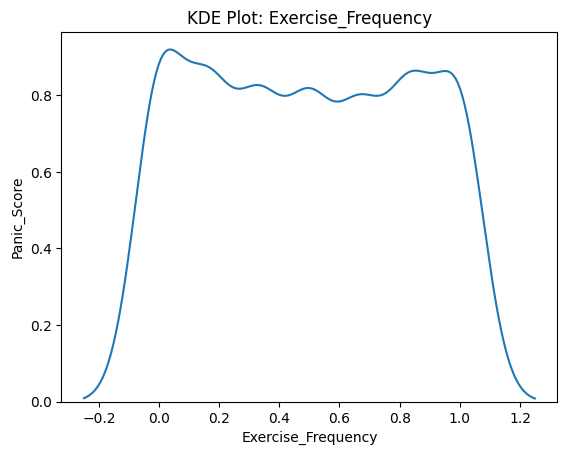

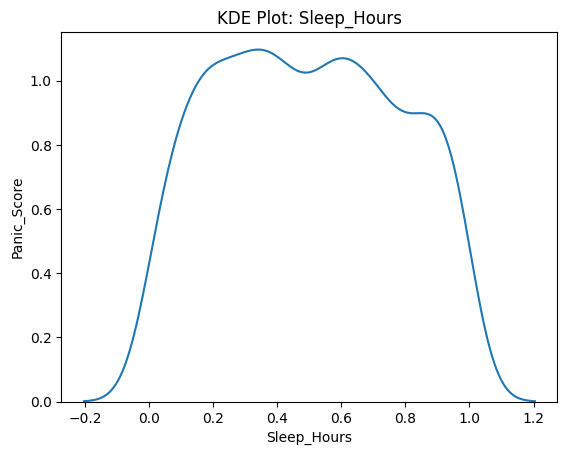

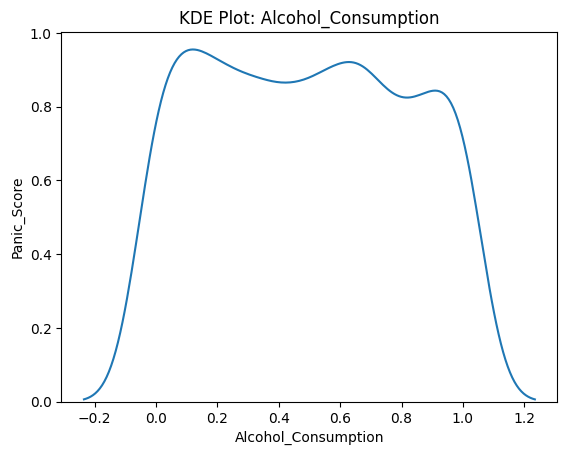

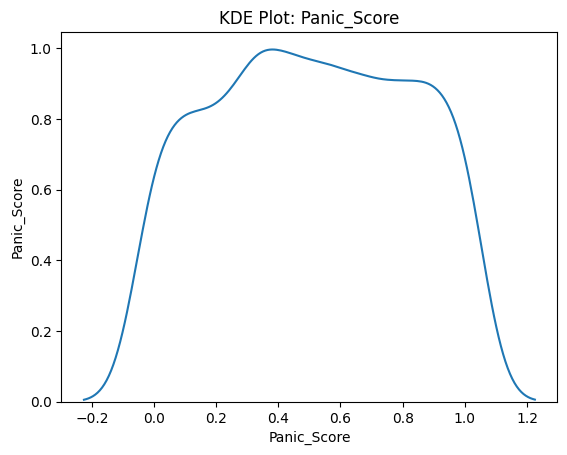

In [64]:
Kde(df)

# QQ plot 

In [65]:
import scipy.stats as stats
def QQ(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:  # Iterate only over numeric columns
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f"{col} QQ Plot")
        plt.show() 

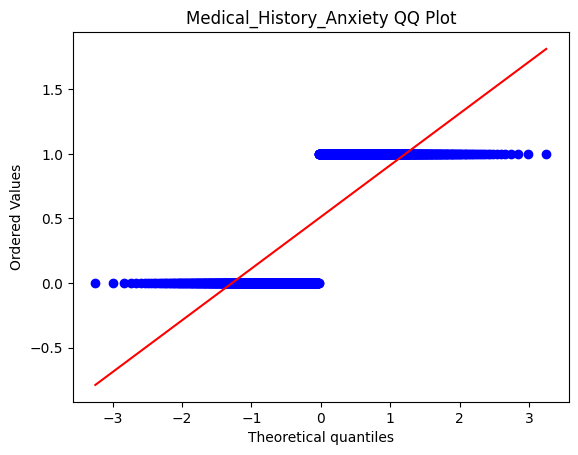

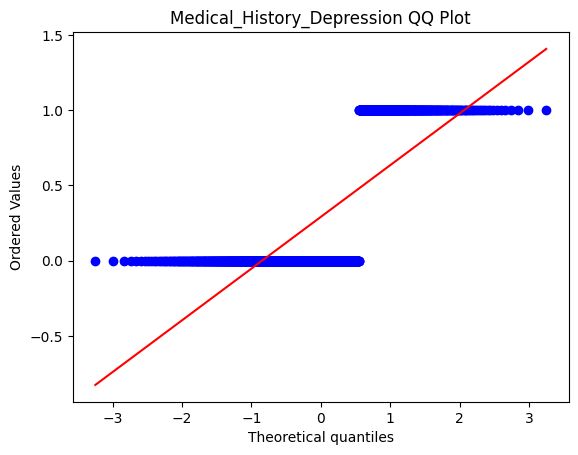

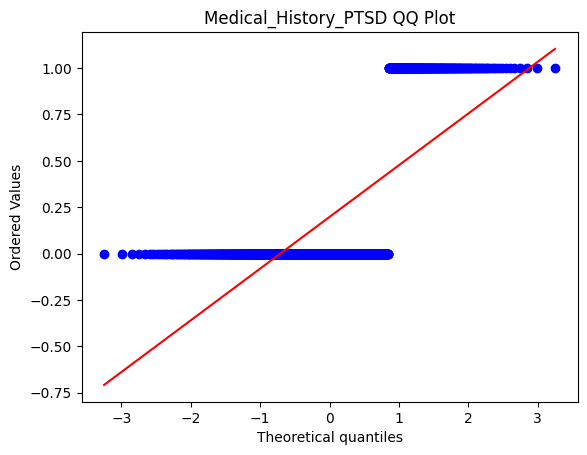

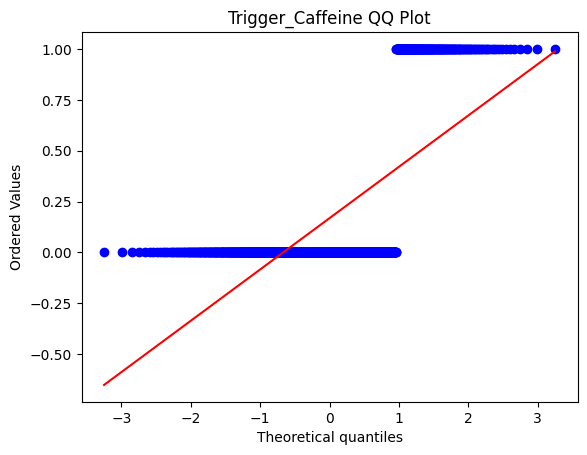

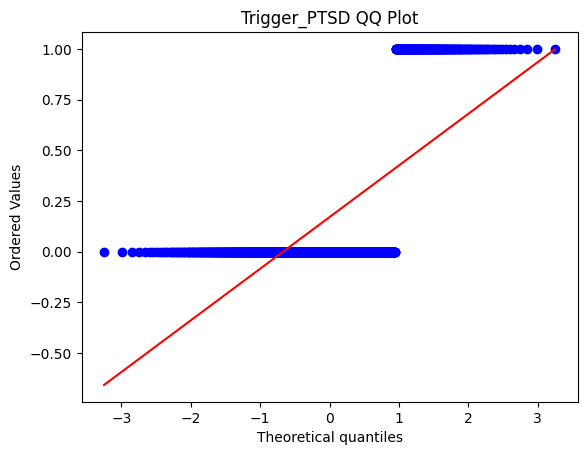

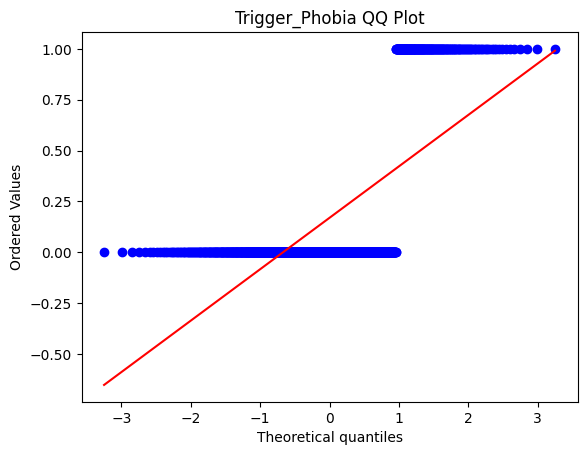

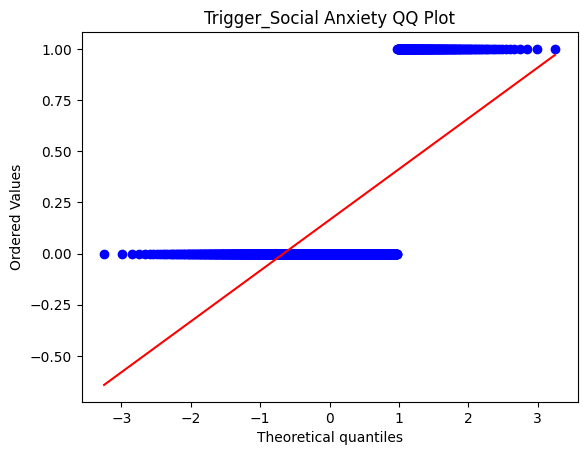

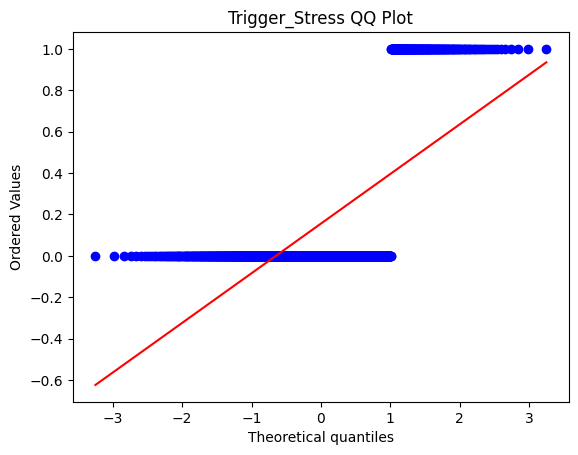

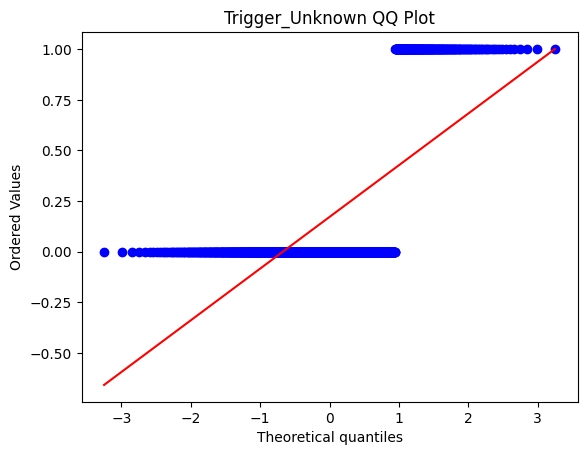

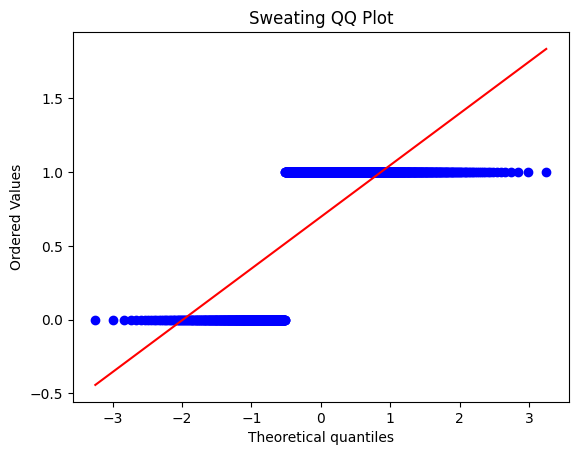

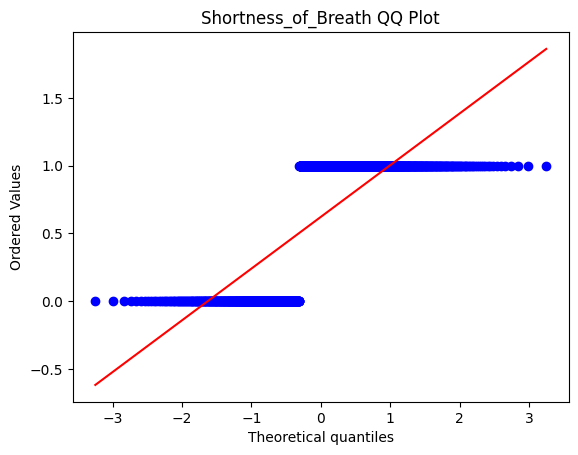

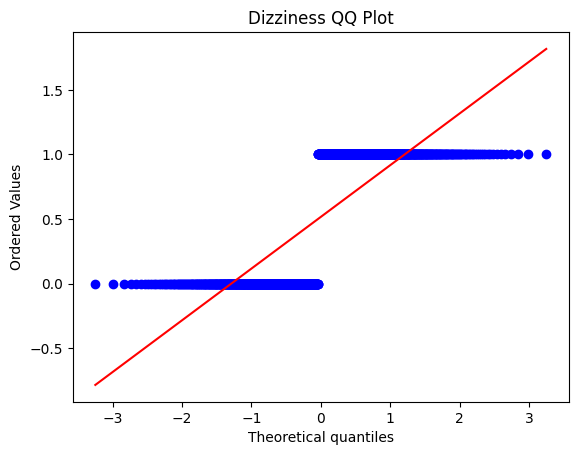

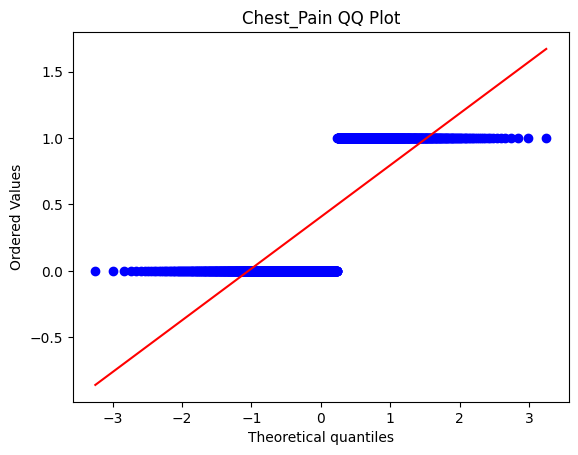

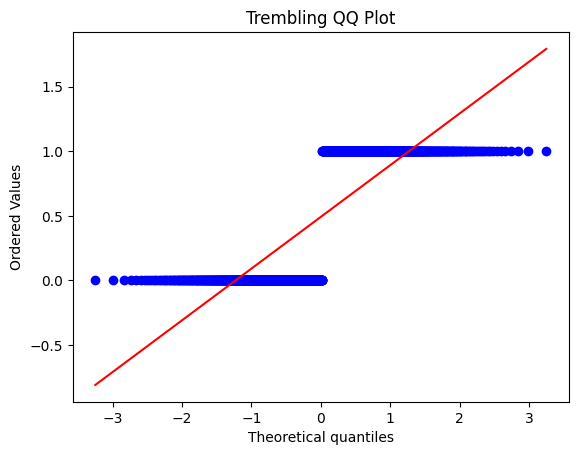

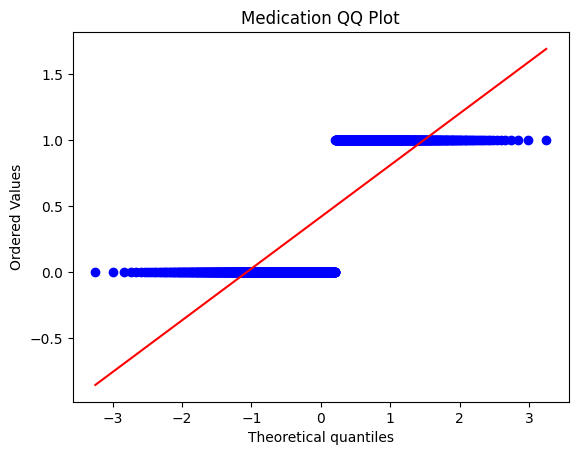

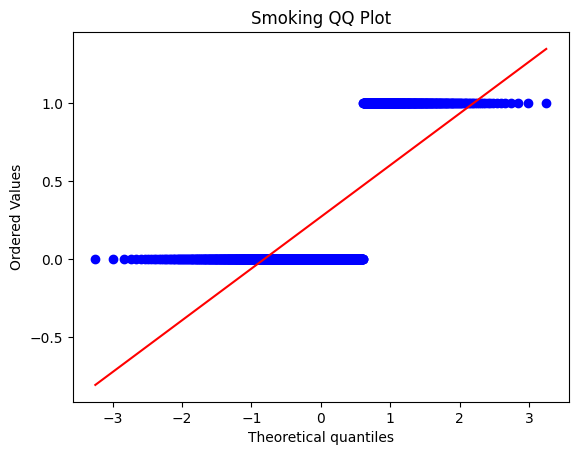

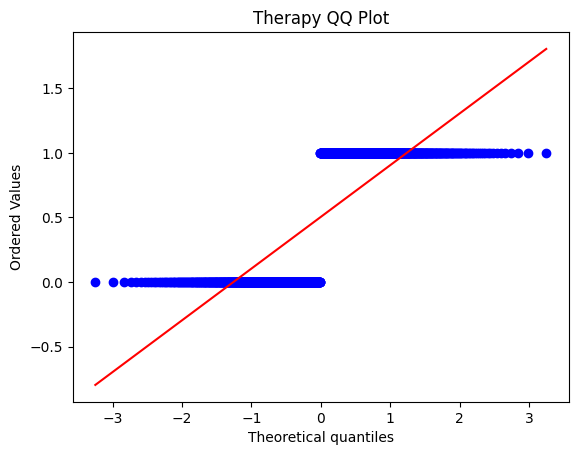

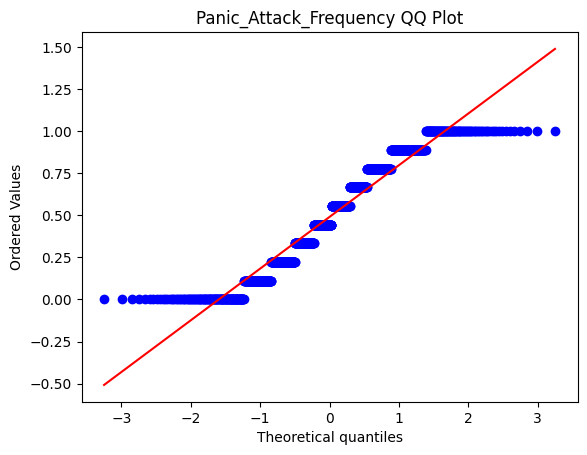

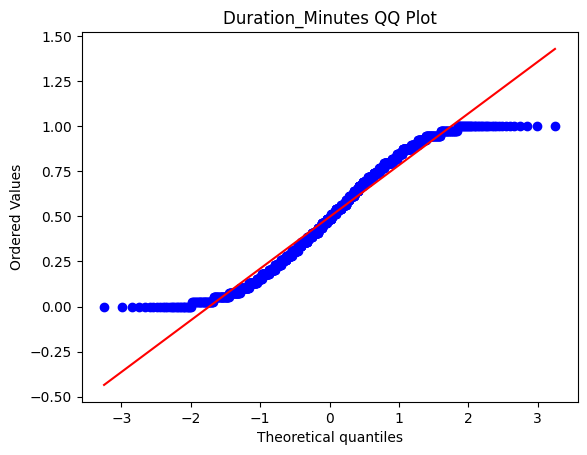

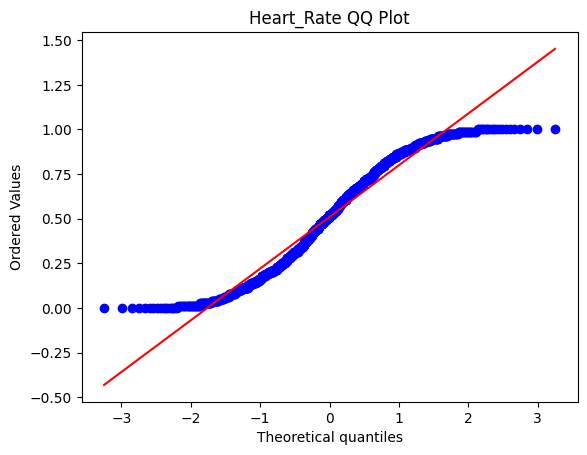

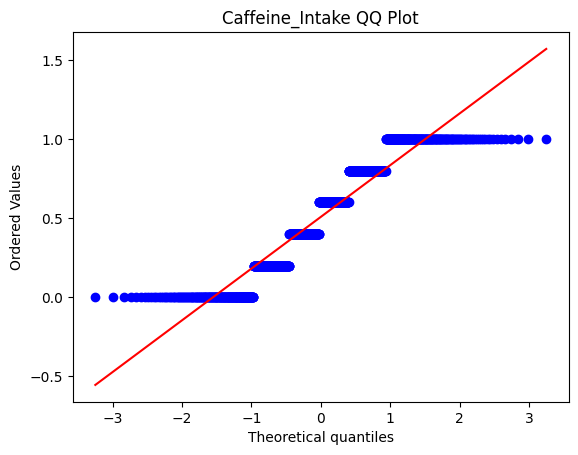

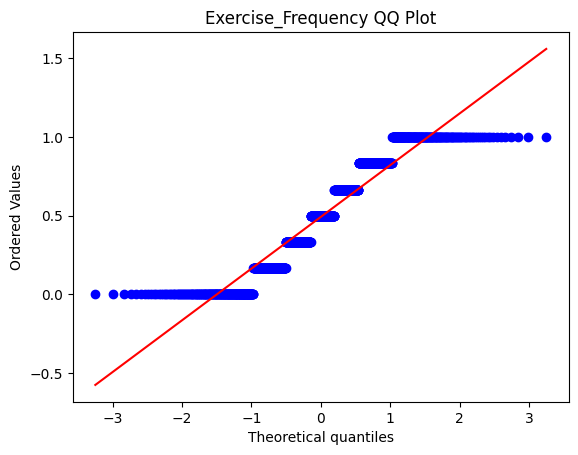

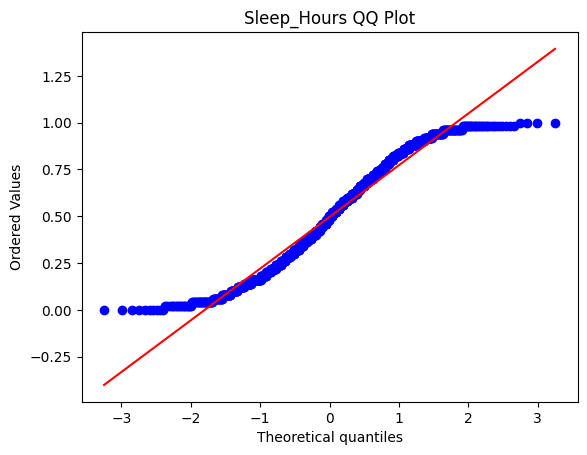

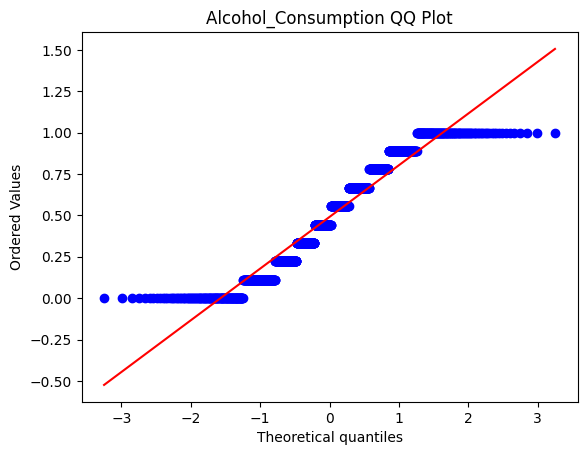

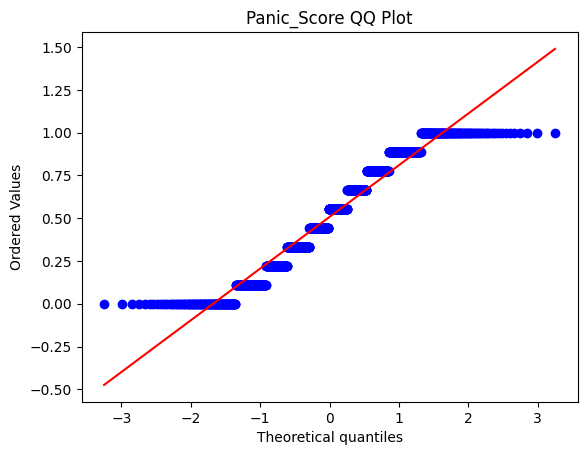

In [66]:
QQ(df)

In [67]:
# Yeo johnson transformation 

from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(method='yeo-johnson')

In [68]:
pt = PowerTransformer(method='yeo-johnson')

X_train_trans = pt.fit_transform(X_train)  # Fit on X_train_trf
X_test_trans = pt.transform(X_test)       # Transform X_test_trf

# Convert back to DataFrame with the original column names
X_train_trans_df = pd.DataFrame(X_train_trans, columns=X_train.columns)
X_test_trans_df = pd.DataFrame(X_test_trans, columns=X_test.columns)


In [69]:
# View the lambdas for each column
lambdas_df = pd.DataFrame({'Column': X_train.columns, 'Lambda': pt.lambdas_})
print(lambdas_df)

                        Column    Lambda
0      Medical_History_Anxiety  0.412761
1   Medical_History_Depression -4.176159
2         Medical_History_PTSD -7.387265
3             Trigger_Caffeine -8.133171
4                 Trigger_PTSD -8.321273
5               Trigger_Phobia -8.385474
6       Trigger_Social Anxiety -8.257833
7               Trigger_Stress -9.693703
8              Trigger_Unknown -8.450453
9                     Sweating  3.521704
10         Shortness_of_Breath  2.273514
11                   Dizziness  0.268083
12                  Chest_Pain -1.908321
13                   Trembling -0.020610
14                  Medication -1.424077
15                     Smoking -4.675004
16                     Therapy  0.185540
17      Panic_Attack_Frequency  0.747547
18            Duration_Minutes  0.703909
19                  Heart_Rate  0.965791
20             Caffeine_Intake  0.639140
21          Exercise_Frequency  0.591512
22                 Sleep_Hours  0.612388
23         Alcoh

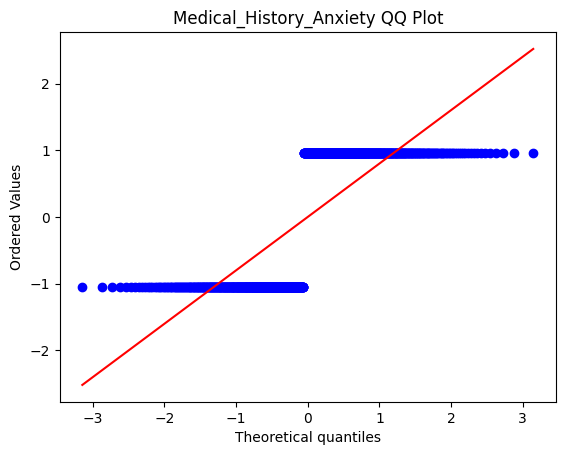

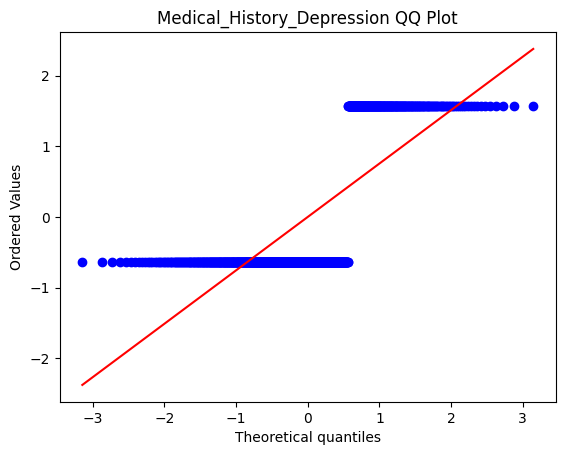

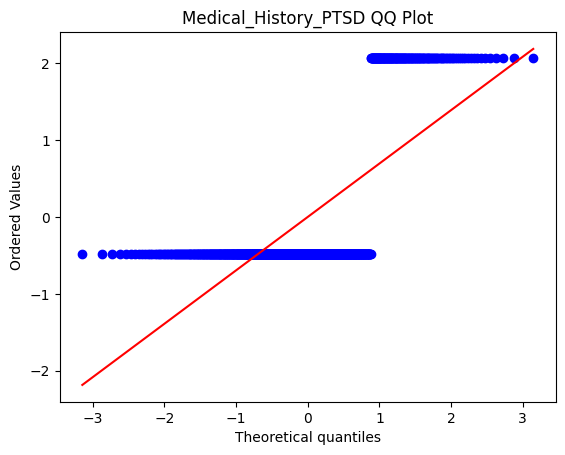

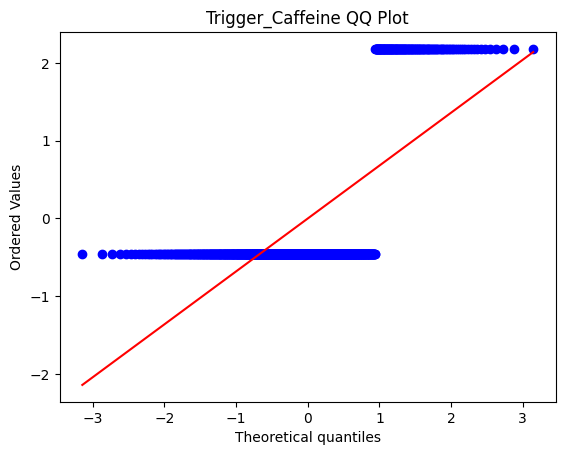

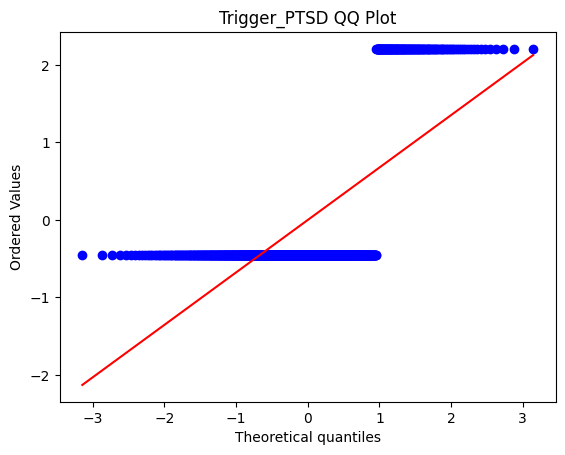

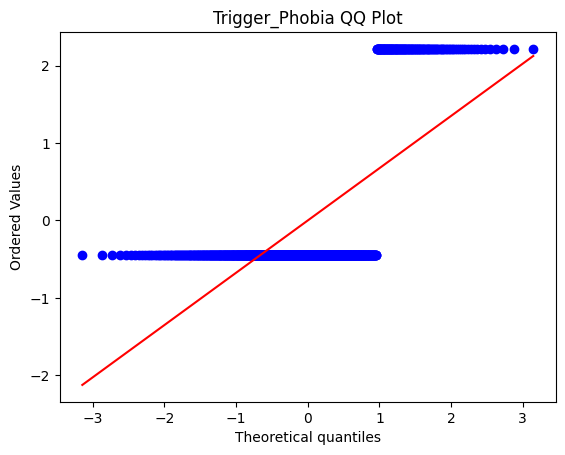

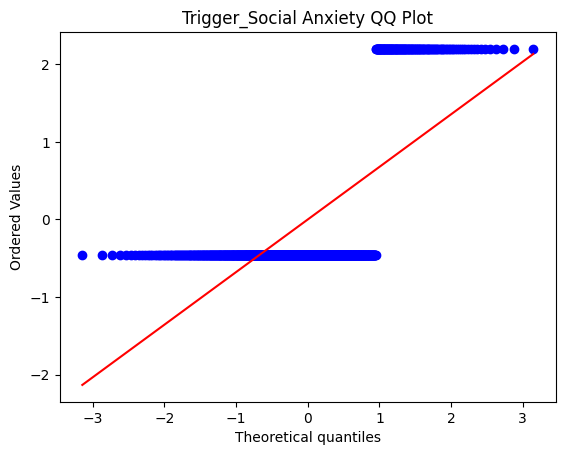

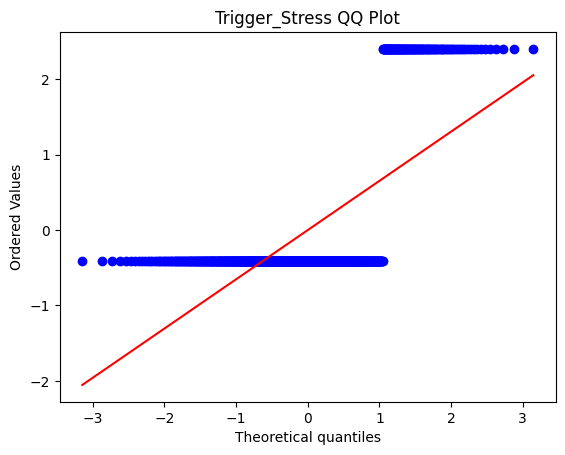

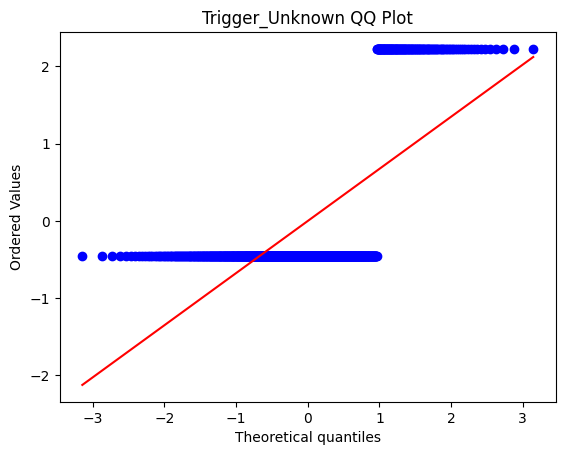

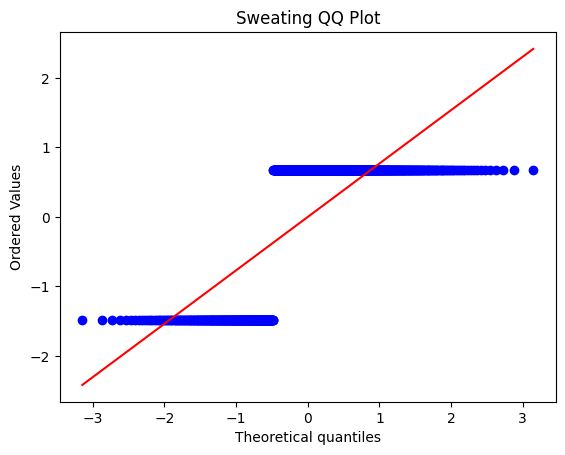

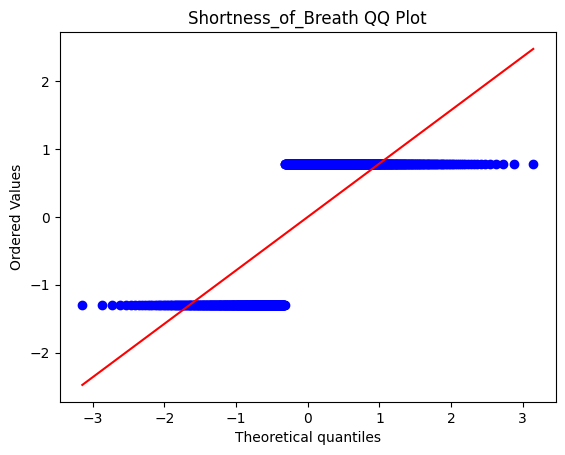

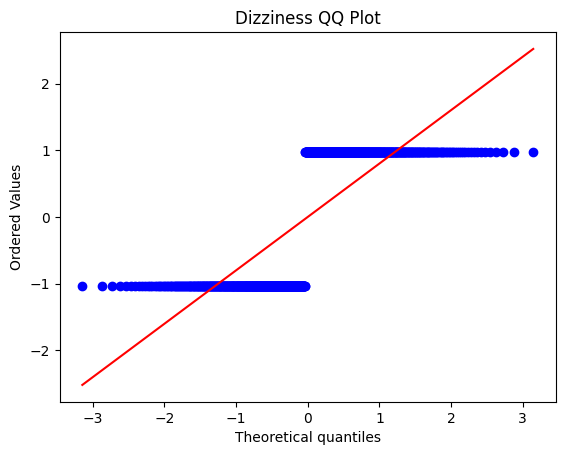

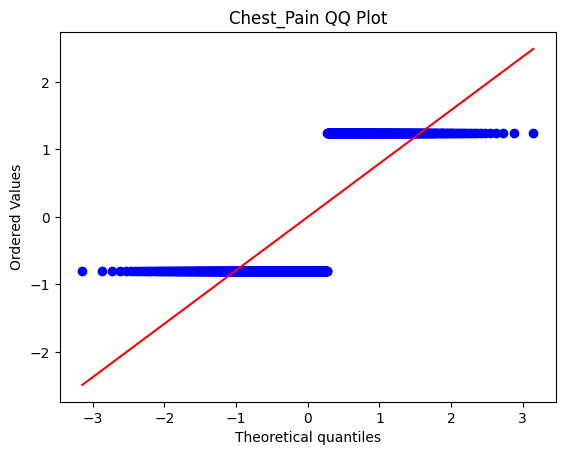

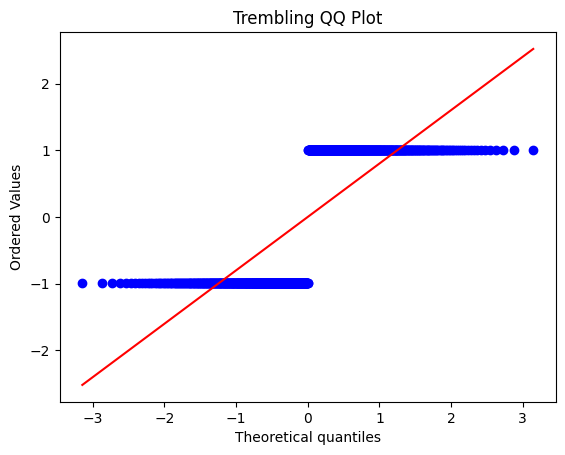

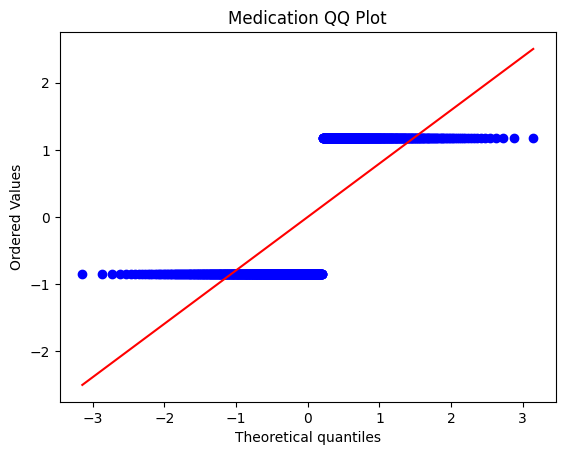

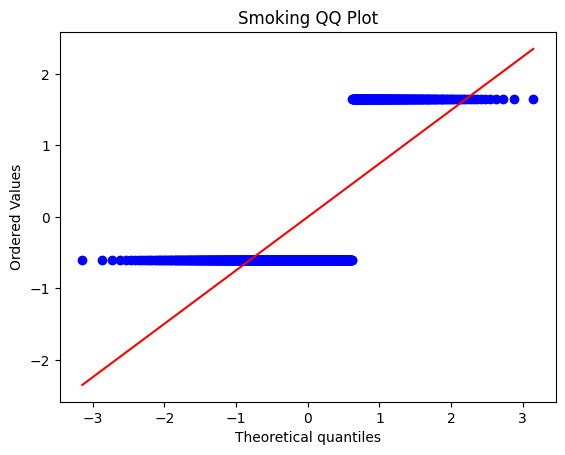

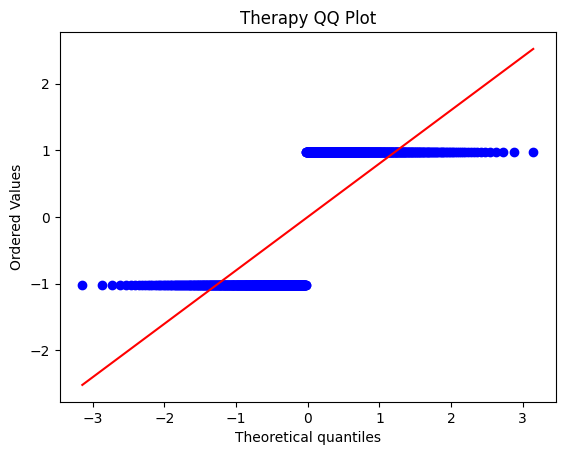

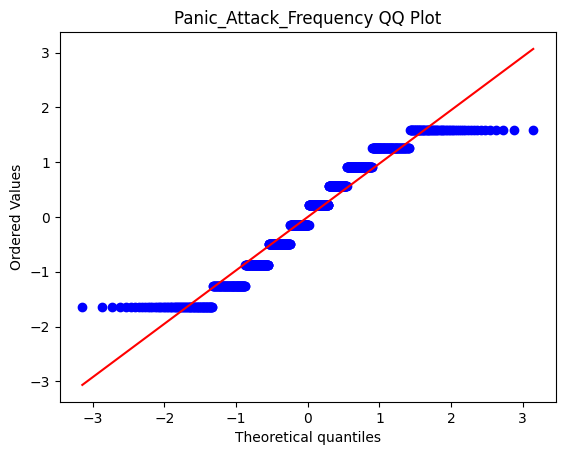

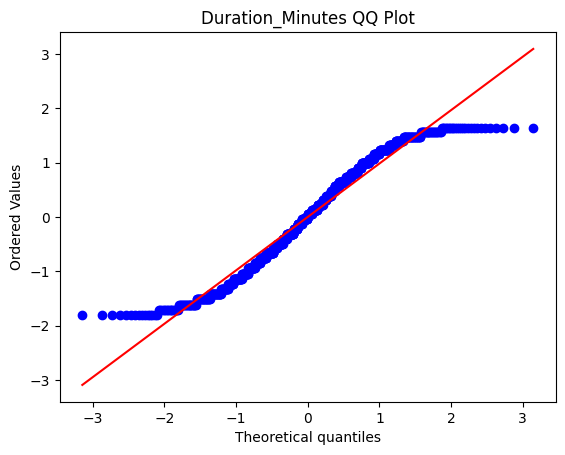

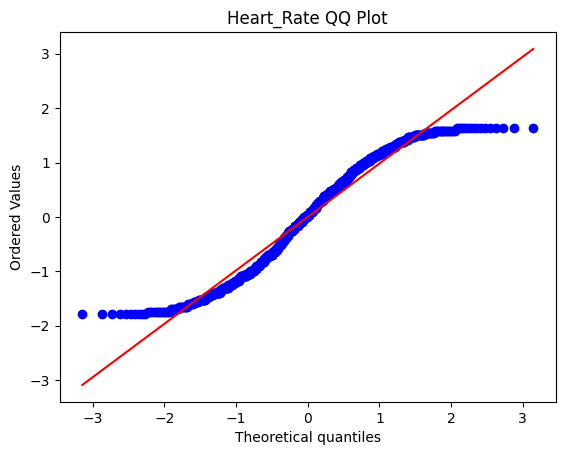

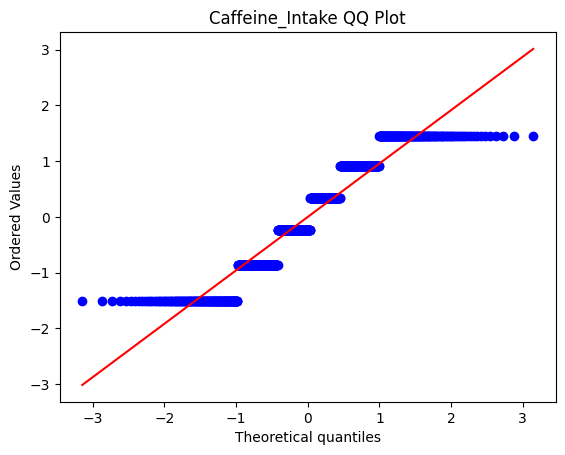

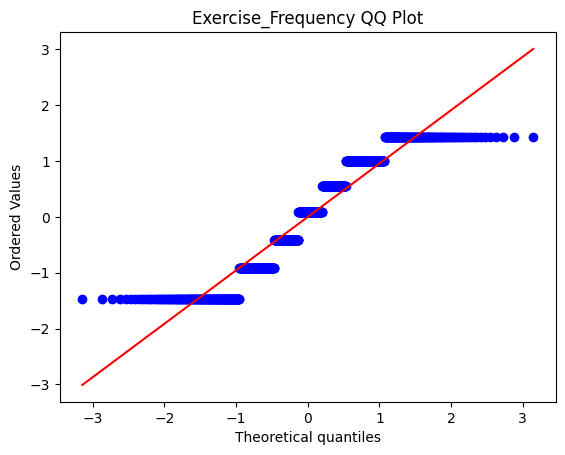

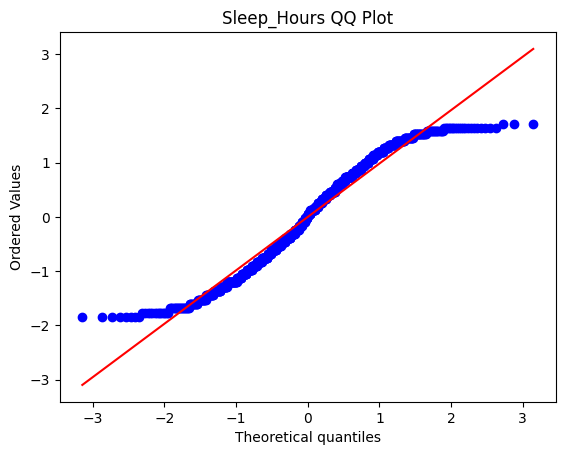

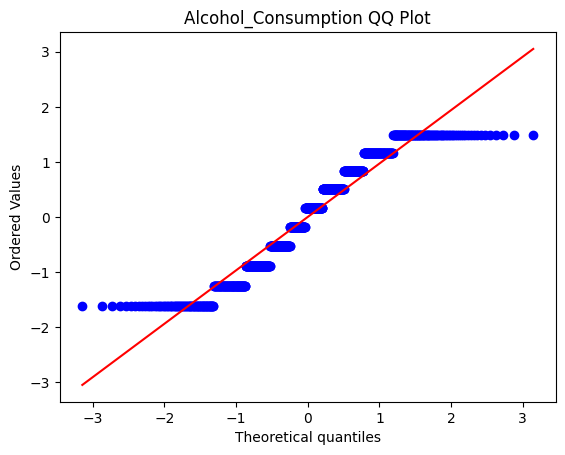

In [70]:
QQ(X_train_trans_df)

In [71]:
X_train_trans_df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption'],
      dtype='object')

In [72]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train_trans_df['Medical_History_Anxiety'] = pt.fit_transform(X_train_trans_df[['Medical_History_Anxiety']])


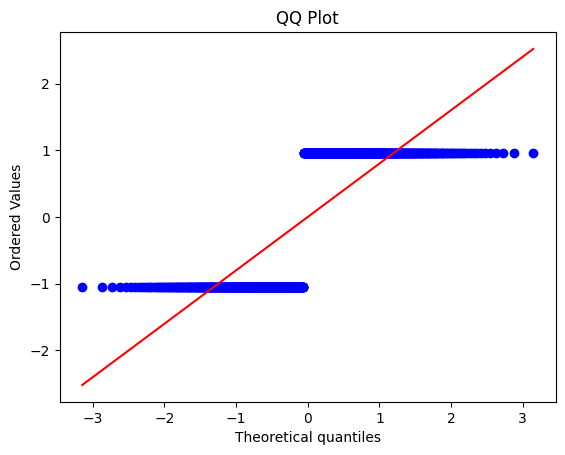

In [73]:
stats.probplot(X_train_trans_df['Medical_History_Anxiety'], dist="norm", plot=plt)
plt.title(f"QQ Plot")
plt.show() 

In [74]:
X_train_trans_df['Medical_History_Anxiety'].describe()


count    8.400000e+02
mean    -2.114711e-17
std      1.000596e+00
min     -1.048809e+00
25%     -1.048809e+00
50%      9.534626e-01
75%      9.534626e-01
max      9.534626e-01
Name: Medical_History_Anxiety, dtype: float64

In [75]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()

In [76]:
dt.fit(X_train_trans_df,y_train)
y_pred = dt.predict(X_test_trans_df)


In [77]:
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

-0.958812143838613


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_trans_df, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [79]:
dt = DecisionTreeRegressor(max_depth=5,min_samples_leaf=1,min_samples_split=10)

In [80]:
dt.fit(X_train_trans_df,y_train)
y_pred = dt.predict(X_test_trans_df)

In [81]:
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

-0.09720143065445885


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), X_train_trans_df, y_train, cv=10, scoring='r2')
print("Cross-validated R2:", scores.mean())

Cross-validated R2: -0.08655096428937803


# Analyze Feature Importance:

Use the Decision Tree's feature_importances_ to identify and remove less relevant features.

In [83]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train_trans_df.columns)
print(feature_importances.sort_values(ascending=False))

Sleep_Hours                   0.232216
Duration_Minutes              0.118444
Alcohol_Consumption           0.087542
Medical_History_Anxiety       0.064689
Therapy                       0.062243
Dizziness                     0.058084
Caffeine_Intake               0.048312
Panic_Attack_Frequency        0.046570
Heart_Rate                    0.042935
Exercise_Frequency            0.038200
Trigger_Phobia                0.037545
Trembling                     0.032599
Shortness_of_Breath           0.029841
Medication                    0.028203
Chest_Pain                    0.026590
Sweating                      0.025556
Trigger_Stress                0.020433
Trigger_Social Anxiety        0.000000
Medical_History_PTSD          0.000000
Trigger_Caffeine              0.000000
Medical_History_Depression    0.000000
Trigger_PTSD                  0.000000
Smoking                       0.000000
Trigger_Unknown               0.000000
dtype: float64


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_trans_df, y_train)
y_pred = gb_model.predict(X_test_trans_df)

from sklearn.metrics import r2_score
print("R2 score (Gradient Boosting):", r2_score(y_test, y_pred))


R2 score (Gradient Boosting): -0.09186888435876828


In [85]:
new_X_train = X_train_trans_df[['Duration_Minutes','Sleep_Hours','Heart_Rate','Dizziness','Medical_History_Anxiety','Alcohol_Consumption','Trigger_Social Anxiety','Panic_Attack_Frequency','Caffeine_Intake','Smoking','Sweating','Trigger_Caffeine','Exercise_Frequency']]

new_X_test = X_test_trans_df[['Duration_Minutes','Sleep_Hours','Heart_Rate','Dizziness','Medical_History_Anxiety','Alcohol_Consumption','Trigger_Social Anxiety','Panic_Attack_Frequency','Caffeine_Intake','Smoking','Sweating','Trigger_Caffeine','Exercise_Frequency']]

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(new_X_train, y_train)
y_pred = gb_model.predict(new_X_test)

from sklearn.metrics import r2_score
print("R2 score (Gradient Boosting):", r2_score(y_test, y_pred))


R2 score (Gradient Boosting): -0.11397338053968187


In [89]:
new_df = df[['Sleep_Hours','Duration_Minutes','Alcohol_Consumption','Medical_History_Anxiety','Therapy','Dizziness','Caffeine_Intake','Panic_Attack_Frequency','Heart_Rate']]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(new_df,y,test_size=0.3,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor()
clf3 = RandomForestRegressor()
clf4 = GradientBoostingRegressor()

# Train models
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

# Make predictions
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

# Evaluate models
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R²:", r2_score(y_test, y_pred1))

print("\nDecision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R²:", r2_score(y_test, y_pred2))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R²:", r2_score(y_test, y_pred3))

print("\nGradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE:", mean_squared_error(y_test, y_pred4))
print("R²:", r2_score(y_test, y_pred4))


Linear Regression:
MAE: 0.25893558737810035
MSE: 0.09137030003296083
R²: -0.016155900692760294

Decision Tree:
MAE: 0.3472222222222222
MSE: 0.19303840877914952
R²: -1.146836751882312

Random Forest:
MAE: 0.26432098765432094
MSE: 0.0956347393689986
R²: -0.06358198108100344

Gradient Boosting:
MAE: 0.26634749773252214
MSE: 0.0981256809267754
R²: -0.09128447260508299
